# Microsoft Malware Prediction


## Library Import

In [ ]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files


pd.options.display.max_rows = 100
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

from pandas import json_normalize
from scipy import stats
from datetime import datetime
from sklearn import model_selection
import xgboost as xgb
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc



from sklearn.tree import export_graphviz
import graphviz

## Data Import

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/mio/sample_mmp.csv")#Ruta Alejandro
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ENTREGABLE_2_GRUPO_4/sample_mmp.csv") #Ruta Mireia
#df = pd.read_csv("/content/drive/MyDrive/Master_Data_Science/Entregables/2ndo Entregable/sample_mmp.csv") #Ruta Iñaki
#df = pd.read_csv("/content/drive/MyDrive/Master_Data_Science/Entregables/2ndo Entregable/sample_mmp.csv") #Ruta Leticia
df = pd.read_csv("./sample_mmp.csv")

C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\1003138533.py:5: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./sample_mmp.csv")


## DATA UNDERSTANDING

### Dataset Analysis: Size, Number of Records, Column Types.




In [ ]:
df.head()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,8427007,f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.00,0,NaN,...,"19,951.00",0,NaN,0.00,0,0,0.00,0.00,11.00,1
1,8829090,fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.00,0,NaN,...,"48,753.00",0,0.00,0.00,0,0,0.00,1.00,3.00,0
2,2731904,4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.00,0,NaN,...,"33,111.00",1,0.00,0.00,1,1,0.00,0.00,15.00,0
3,1359513,270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.00,0,NaN,...,"48,473.00",1,NaN,0.00,0,0,0.00,0.00,15.00,1
4,236059,06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.00,0,NaN,...,"4,343.00",1,NaN,0.00,1,0,0.00,1.00,13.00,1


In [ ]:
df.head().T

,0,1,2,3,4
Unnamed: 0,8427007,8829090,2731904,1359513,236059
MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5,06ca8fa8d32c2abdc5b3577d676b3269
ProductName,win8defender,win8defender,win8defender,win8defender,win8defender
EngineVersion,1.1.15100.1,1.1.15100.1,1.1.15100.1,1.1.15200.1,1.1.15200.1
AppVersion,4.18.1807.18075,4.18.1807.18075,4.9.10586.1106,4.18.1807.18075,4.18.1807.18075
AvSigVersion,1.273.1234.0,1.273.1282.0,1.273.781.0,1.275.1639.0,1.275.511.0
IsBeta,0,0,0,0,0
RtpStateBitfield,7.00,7.00,7.00,7.00,7.00
IsSxsPassiveMode,0,0,0,0,0
DefaultBrowsersIdentifier,NaN,NaN,NaN,NaN,NaN


In [ ]:

df.shape

(500000, 84)

In [ ]:
df.info(verbose = False)
# 82 columns, of which 53 are numerical and 29 are categorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(36), int64(18), object(30)
memory usage: 320.4+ MB


### Pre-adjustment of Column Types

#### Index.

In [ ]:
# "The first column 'Unnamed: 0' is the index of the original dataset, it has the same number of unique values as rows."
df["Unnamed: 0"].nunique()

500000

In [ ]:
# The column is removed since it does not provide any information
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
# MachineIdentifier also has the same number of unique values as the number of rows in the dataset.
df["MachineIdentifier"].nunique()

500000

In [ ]:
#  MachineIdentifier as index
df.set_index("MachineIdentifier", inplace=True)

In [ ]:
df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
f1cd864e97bae82bdf96523e1a539121,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1234.0,0,7.00,0,NaN,"53,447.00",1.00,...,"19,951.00",0,NaN,0.00,0,0,0.00,0.00,11.00,1
fd5ba6f5b75325ec0423a6c67cc75942,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1282.0,0,7.00,0,NaN,"53,447.00",1.00,...,"48,753.00",0,0.00,0.00,0,0,0.00,1.00,3.00,0
4e628391e7cc7c482fb3286f486dbd25,win8defender,1.1.15100.1,4.9.10586.1106,1.273.781.0,0,7.00,0,NaN,"46,781.00",2.00,...,"33,111.00",1,0.00,0.00,1,1,0.00,0.00,15.00,0
270a2e9d028144a4df12a9e3da79fba5,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1639.0,0,7.00,0,NaN,"53,447.00",1.00,...,"48,473.00",1,NaN,0.00,0,0,0.00,0.00,15.00,1
06ca8fa8d32c2abdc5b3577d676b3269,win8defender,1.1.15200.1,4.18.1807.18075,1.275.511.0,0,7.00,0,NaN,"47,238.00",2.00,...,"4,343.00",1,NaN,0.00,1,0,0.00,1.00,13.00,1


#### Columns with "Identifier" in the name: Convert to categorical.

Identifier columns are actually categorical columns, since, although the identifier is a number, they do not have an inherent order.

In [ ]:
#list of "false" numerical columns (Identifier columns)
falsas_num = df.loc[:, df.columns.str.contains("Identifier")].columns
falsas_num

Index(['DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_OSInstallLanguageIdentifier',
       'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Wdft_RegionIdentifier'],
      dtype='object')

<Axes: >

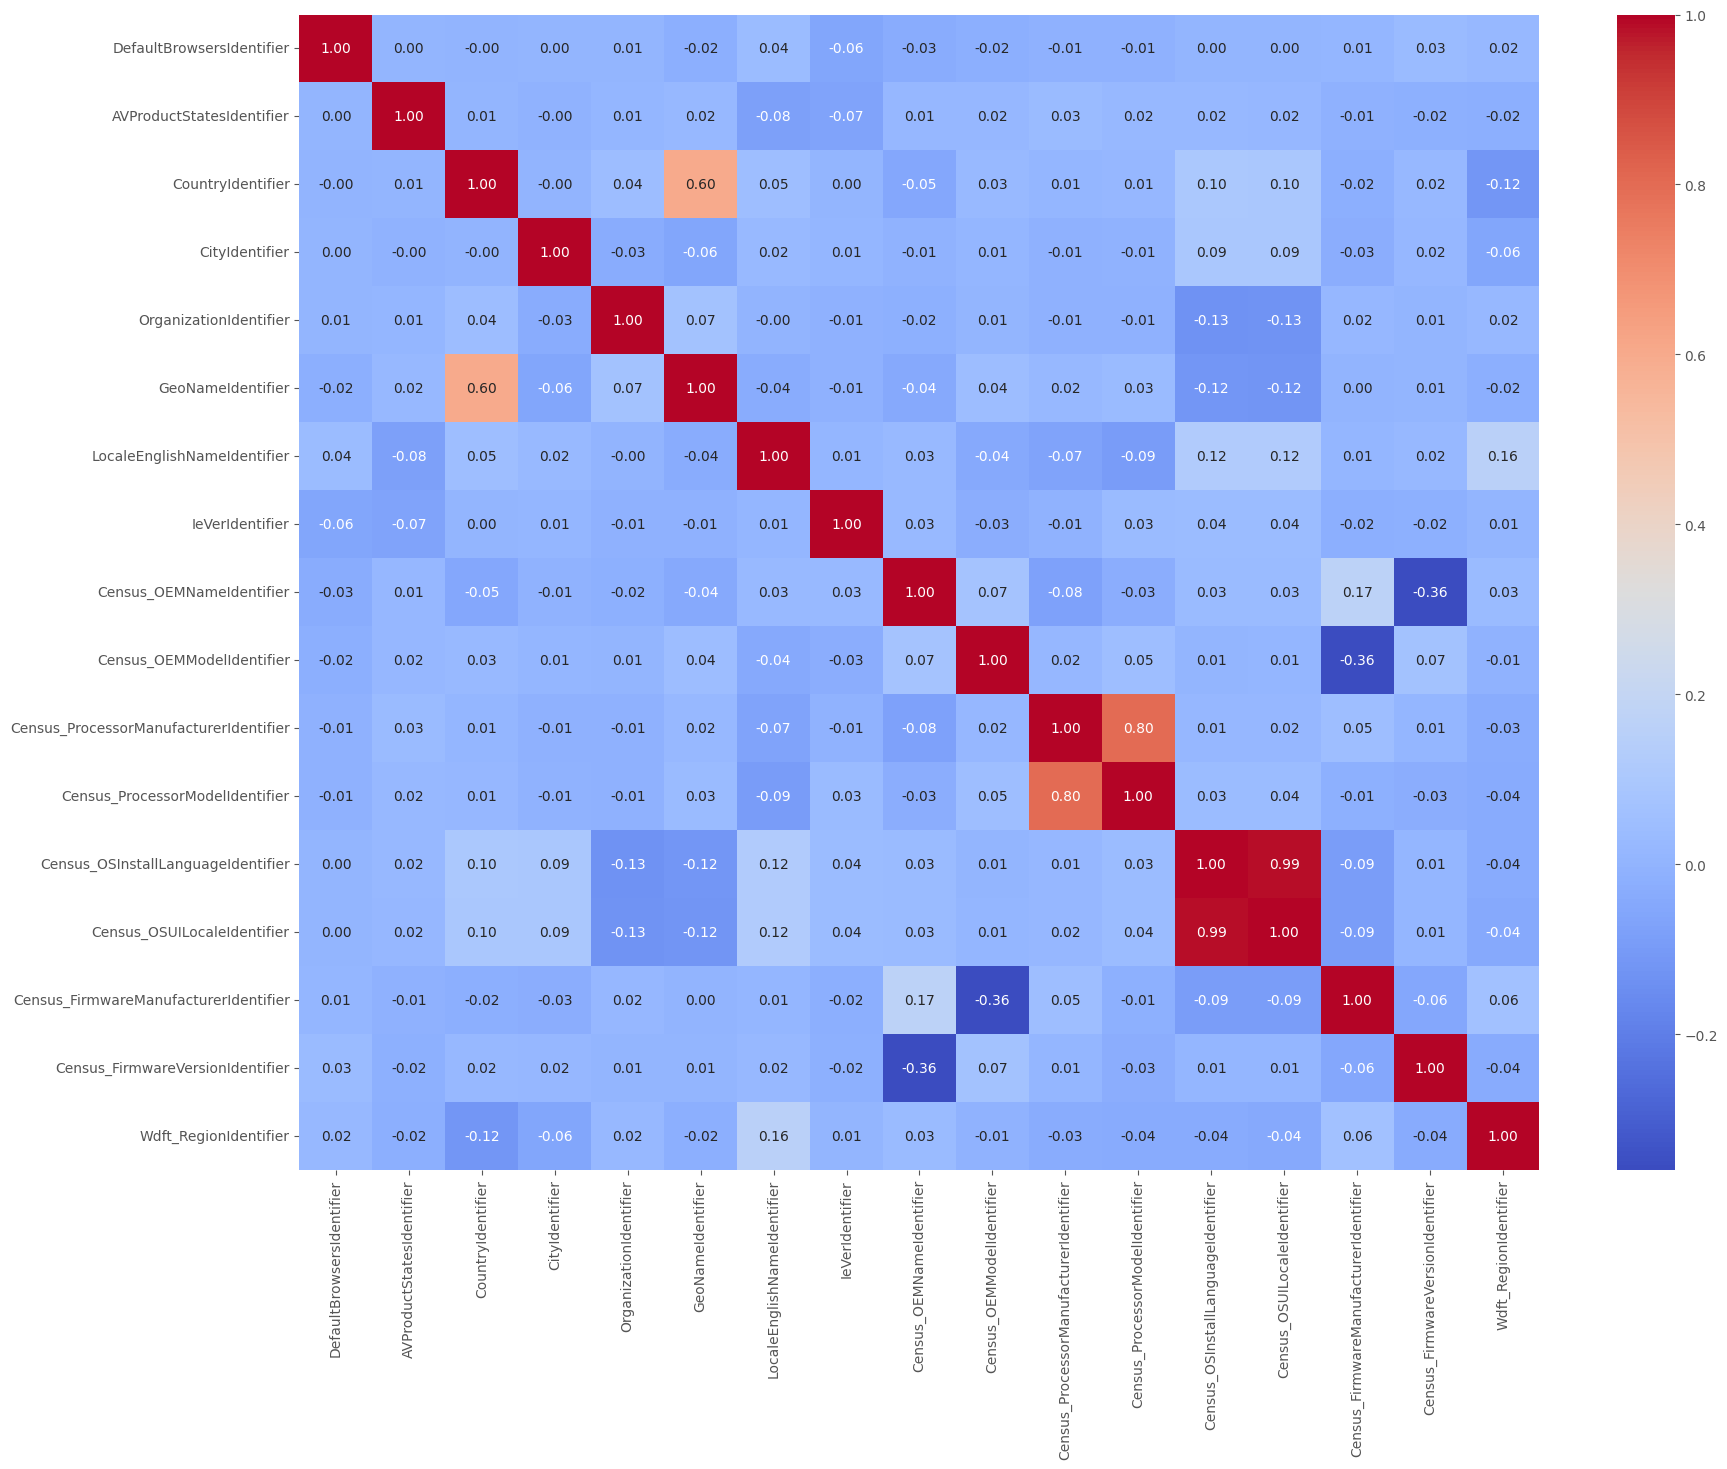

In [ ]:
#Before converting them to categorical columns, check if they correlate with each other to see if we can delete some of them
corr_matriz_num = df[falsas_num].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matriz_num, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
#I´m eliminating Census_OSInstallLanguageIdentifier or Census_OSUILocaleIdentifier: The one with the most unique records.
df["Census_OSInstallLanguageIdentifier"].nunique()

39

In [ ]:
df["Census_OSUILocaleIdentifier"].nunique()

92

In [ ]:
#converting false numerical columns to categorical. 
for col in falsas_num:
  df[col] = df[col].astype("object")

In [ ]:
df[falsas_num].info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   DefaultBrowsersIdentifier               24061 non-null   object
 1   AVProductStatesIdentifier               498062 non-null  object
 2   CountryIdentifier                       500000 non-null  object
 3   CityIdentifier                          481760 non-null  object
 4   OrganizationIdentifier                  345437 non-null  object
 5   GeoNameIdentifier                       499984 non-null  object
 6   LocaleEnglishNameIdentifier             500000 non-null  object
 7   IeVerIdentifier                         496791 non-null  object
 8   Census_OEMNameIdentifier                494619 non-null  object
 9   Census_OEMModelIdentifier               494236 non-null  object
 10  Cens

In [ ]:
# delate Census_OSUILocaleIdentifier
df.drop("Census_OSUILocaleIdentifier", axis = 1, inplace = True)

In [ ]:
# I´m also converting  OsSuite to categorical: it doesn´t have inherent order.
df["OsSuite"] = df["OsSuite"].astype("object")

In [ ]:
df["OsSuite"].value_counts()

OsSuite
768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: count, dtype: int64

### Descriptive Statistics

In [ ]:
#DESCRIBE NUMERICAL COLUMNS:
df.describe(include=np.number).T

# Many are boolean, with a minimum value of 0 and a maximum value of 1 (1.000000e+00).
# Many of the boolean columns are highly imbalanced, with a mean of 0.00 ----> to be removed during Data Preparation.
# Several columns contain null values.

,count,mean,std,min,25%,50%,75%,max
IsBeta,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00
RtpStateBitfield,"498,168.00",6.85,1.02,0.00,7.00,7.00,7.00,35.00
IsSxsPassiveMode,"500,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
AVProductsInstalled,"498,062.00",1.33,0.52,1.00,1.00,1.00,2.00,5.00
AVProductsEnabled,"498,062.00",1.02,0.17,0.00,1.00,1.00,1.00,4.00
HasTpm,"500,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00
OsBuild,"500,000.00","15,726.93","2,188.65","7,600.00","15,063.00","16,299.00","17,134.00","18,242.00"
IsProtected,"498,074.00",0.95,0.23,0.00,1.00,1.00,1.00,1.00
AutoSampleOptIn,"500,000.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
SMode,"470,152.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00


In [ ]:
#DESCRIBE CATEGORICAL FEATURES
df.describe(exclude=np.number).T

# PuaMode: only 1 label and null values ---> convert to boolean during Data Preparation.
# There are several highly imbalanced columns ---> remove during Data Preparation.
# There are several columns with null values.

,count,unique,top,freq
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
DefaultBrowsersIdentifier,"24,061.00",554.00,239.00,"2,589.00"
AVProductStatesIdentifier,"498,062.00","5,516.00","53,447.00","326,463.00"
CountryIdentifier,500000,222,43,22339
CityIdentifier,"481,760.00","37,157.00","130,775.00","5,271.00"
OrganizationIdentifier,"345,437.00",44.00,27.00,"234,885.00"
GeoNameIdentifier,"499,984.00",268.00,277.00,"86,080.00"


### Valores nulos

In [ ]:
#null count:
conteo_nulos = df.isnull().sum()
conteo_nulos = conteo_nulos.to_frame().T
conteo_nulos.index = ["conteo_nulos"]
conteo_nulos.T

,conteo_nulos
ProductName,0
EngineVersion,0
AppVersion,0
AvSigVersion,0
IsBeta,0
RtpStateBitfield,1832
IsSxsPassiveMode,0
DefaultBrowsersIdentifier,475939
AVProductStatesIdentifier,1938
AVProductsInstalled,1938


In [ ]:
#percentage of nulls:
porcentaje_nulos = df.isnull().sum()*100/df.shape[0]
porcentaje_nulos = porcentaje_nulos.to_frame().T
porcentaje_nulos.index = ["%-nulos"]
porcentaje_nulos.T

,%-nulos
ProductName,0.00
EngineVersion,0.00
AppVersion,0.00
AvSigVersion,0.00
IsBeta,0.00
RtpStateBitfield,0.37
IsSxsPassiveMode,0.00
DefaultBrowsersIdentifier,95.19
AVProductStatesIdentifier,0.39
AVProductsInstalled,0.39


### Extract Excel with Columns

In [ ]:
#nunique
nunique_con_nulos = df.nunique(dropna = False)
nunique_con_nulos = nunique_con_nulos.to_frame().T
nunique_con_nulos.index = ["unique_incluido_NAN"]
nunique_con_nulos

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
unique_incluido_NAN,3,53,95,6455,2,8,2,555,5517,6,...,23570,2,2,3,2,2,3,3,16,2


In [ ]:
#dtypes
dtypes = df.dtypes
dtypes = dtypes.to_frame().T
dtypes.index = ["dtypes"]
dtypes

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
dtypes,object,object,object,object,int64,float64,int64,object,object,float64,...,object,int64,float64,float64,int64,int64,float64,float64,object,int64


In [ ]:
describe = df.describe(include = "all")
describe = pd.concat([dtypes, conteo_nulos, porcentaje_nulos, nunique_con_nulos, describe])
describe = describe.T
describe.fillna("-", inplace = True)
describe["%-nulos"] = describe["%-nulos"].round(2)
describe.rename(columns = {"unique" : "unique_sin_NaN"}, inplace = True)
describe

C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\3561613224.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  describe.fillna("-", inplace = True)


,dtypes,conteo_nulos,%-nulos,unique_incluido_NAN,count,unique_sin_NaN,top,freq,mean,std,min,25%,50%,75%,max
ProductName,object,0,0.00,3,"500,000.00",3,win8defender,494604,-,-,-,-,-,-,-
EngineVersion,object,0,0.00,53,"500,000.00",53,1.1.15200.1,216491,-,-,-,-,-,-,-
AppVersion,object,0,0.00,95,"500,000.00",95,4.18.1807.18075,288809,-,-,-,-,-,-,-
AvSigVersion,object,0,0.00,6455,"500,000.00",6455,1.273.1420.0,5771,-,-,-,-,-,-,-
IsBeta,int64,0,0.00,2,"500,000.00",-,-,-,0.00,0.00,0.00,0.00,0.00,0.00,1.00
RtpStateBitfield,float64,1832,0.37,8,"498,168.00",-,-,-,6.85,1.02,0.00,7.00,7.00,7.00,35.00
IsSxsPassiveMode,int64,0,0.00,2,"500,000.00",-,-,-,0.02,0.13,0.00,0.00,0.00,0.00,1.00
DefaultBrowsersIdentifier,object,475939,95.19,555,"24,061.00",554.00,239.00,"2,589.00",-,-,-,-,-,-,-
AVProductStatesIdentifier,object,1938,0.39,5517,"498,062.00","5,516.00","53,447.00","326,463.00",-,-,-,-,-,-,-
AVProductsInstalled,float64,1938,0.39,6,"498,062.00",-,-,-,1.33,0.52,1.00,1.00,1.00,2.00,5.00


In [ ]:
#describe.to_excel('/content/drive/MyDrive/Colab Notebooks/ENTREGABLE_2_GRUPO_4/df_describe.xlsx')

### Target Analysis

In [ ]:
# Target mean = 50% aprox. 
df["HasDetections"].mean()

0.499906

In [ ]:
# The target has no null values and is boolean (1 or 0). In short, 50% of the machines in the dataset were infected, while the other 50% were not.
df["HasDetections"].value_counts(dropna = False, normalize=True)

HasDetections
0   0.50
1   0.50
Name: proportion, dtype: float64

### Generate lists of numerical, boolean, and categorical variables. FUNCTION get_variable_list(dataset)

In [ ]:
#hago listas por tipo de variables.
target_col = ['HasDetections']

def obtener_lista_variables(dataset):
  lista_numericas = []
  lista_boolean = []
  lista_categoricas = []

  for i in dataset:
    if (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and dataset[i].nunique() > 2 and i not in target_col:
      lista_numericas.append(i)
    elif (dataset[i].dtype.kind == "i" or dataset[i].dtype.kind == "f") and  dataset[i].nunique() <= 2 and  i not in target_col:
      lista_boolean.append(i)
    elif dataset[i].dtype.kind == "O" and i not in target_col:
      lista_categoricas.append(i)

  return lista_numericas, lista_boolean, lista_categoricas

In [ ]:
num, bol, cat = obtener_lista_variables(df)

In [ ]:
print(f"num (columnas numericas): {len(num)}  \nbol (columnas booleanas): {len(bol)} \ncat (columnas categoricas):{len(cat)} ")

num (columnas numericas): 15  
bol (columnas booleanas): 19 
cat (columnas categoricas):46 


### Univariate Analysis, Outlier Identification, and Error Values.

#### Categorical

In [ ]:
for col in cat:
  print(f"{df[col].value_counts(dropna=False)}\n\n")
#Columns like EngineVersion: we can convert them to numerical values since the versions range from older to more recent.

ProductName
win8defender     494604
mse                5395
mseprerelease         1
Name: count, dtype: int64


EngineVersion
1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.12804.0     

In [ ]:
#There are two types of antivirus: Windows Defender and MSE. The pre-release version of MSE, which has only one record, will be imputed as MSE.
df.ProductName.value_counts(dropna=False)

ProductName
win8defender     494604
mse                5395
mseprerelease         1
Name: count, dtype: int64

In [ ]:
df['ProductName'] = df['ProductName'].replace('mseprerelease', 'mse')

In [ ]:
df.ProductName.value_counts(dropna=False)

ProductName
win8defender    494604
mse               5396
Name: count, dtype: int64

<Axes: xlabel='ProductName', ylabel='HasDetections'>

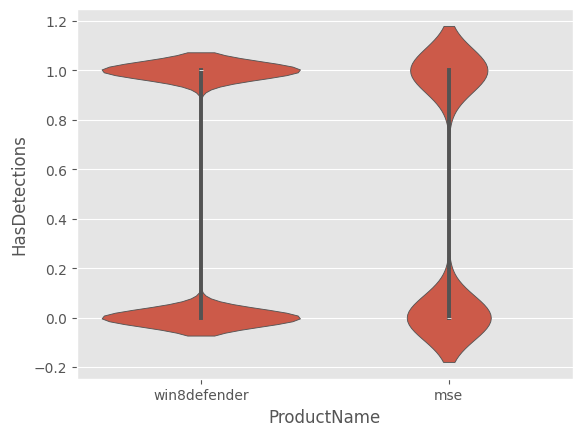

In [ ]:
#The type of antivirus is correlated with the target.
sns.violinplot(x="ProductName", y="HasDetections",data=df)

<Axes: xlabel='EngineVersion', ylabel='HasDetections'>

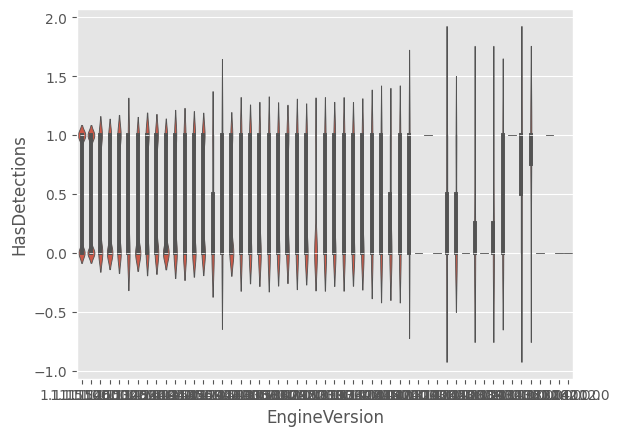

In [ ]:
sns.violinplot(x="EngineVersion", y="HasDetections",data=df)

<Axes: xlabel='Platform', ylabel='HasDetections'>

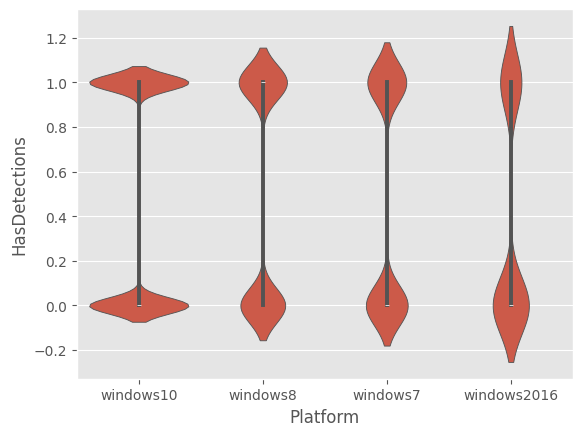

In [ ]:
sns.violinplot(x="Platform", y="HasDetections",data=df)

In [ ]:
#  less than 100 categories -> OHE
df.OsPlatformSubRelease.value_counts(dropna=False)

OsPlatformSubRelease
rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: count, dtype: int64

In [ ]:
# 453 categories. OHE and group minority ones
df.OsBuildLab.value_counts(dropna=False)

OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                 206436
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908     69884
16299.15.amd64fre.rs3_release.170928-1534                 53826
15063.0.amd64fre.rs2_release.170317-1834                  39908
17134.1.x86fre.rs4_release.180410-1804                    14334
                                                          ...  
7600.21980.amd64fre.win7_ldr.150318-1623                      1
9600.18146.x86fre.winblue_ltsb.151121-0600                    1
17692.1000.x86fre.rs_prerelease.180609-1317                   1
14393.2156.amd64fre.rs1_release_inmarket.180321-1733          1
9600.18007.amd64fre.winblue_ltsb.150807-0612                  1
Name: count, Length: 454, dtype: int64

In [ ]:
df["OsBuildLab"].value_counts()[df["OsBuildLab"].value_counts()<1000]

OsBuildLab
10586.672.amd64fre.th2_release_sec.161024-1825    975
10586.162.amd64fre.th2_release_sec.160223-1728    952
14393.1358.amd64fre.rs1_release.170602-2252       944
9600.19125.amd64fre.winblue_ltsb.180812-0703      873
10586.1106.amd64fre.th2_release.170904-1742       869
                                                 ... 
17604.1000.amd64fre.rs_prerelease.180209-1422       1
9600.17041.amd64fre.winblue_gdr.140305-1710         1
9600.18146.x86fre.winblue_ltsb.151121-0600          1
18214.1000.amd64fre.rs_prerelease.180803-1553       1
9600.18007.amd64fre.winblue_ltsb.150807-0612        1
Name: count, Length: 424, dtype: int64

In [ ]:
#  less than 100 categories -> OHE
df.SkuEdition.value_counts(dropna=False)

SkuEdition
Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: count, dtype: int64

In [ ]:
# % nulls >90%, delete columns
df.PuaMode.value_counts(dropna=False)

PuaMode
NaN    499874
on        126
Name: count, dtype: int64

In [ ]:
# Unify labels
df.SmartScreen.value_counts(dropna=False)

SmartScreen
RequireAdmin    241594
NaN             178596
ExistsNotSet     58497
Off              10388
Warn              7530
Prompt            1950
Block             1274
off                 75
On                  53
&#x02;              20
&#x01;              14
on                   8
requireadmin         1
Name: count, dtype: int64

In [ ]:
#  less than 100 categories -> OHE
df.Census_MDC2FormFactor.value_counts(dropna=False)

Census_MDC2FormFactor
Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: count, dtype: int64

In [ ]:
#hacer booleano, IsWindows.Desktop
df.Census_DeviceFamily.value_counts(dropna=False)

Census_DeviceFamily
Windows.Desktop    499183
Windows.Server        816
Windows                 1
Name: count, dtype: int64

In [ ]:
#nulos>90%. delete
df.Census_ProcessorClass.value_counts(dropna=False)

Census_ProcessorClass
NaN     497918
mid       1196
low        546
high       340
Name: count, dtype: int64

In [ ]:
#Impute nulls and "Unspecified" as UNKNOWN.
df.Census_PrimaryDiskTypeName.value_counts(dropna=False)

Census_PrimaryDiskTypeName
HDD            325429
SSD            138155
UNKNOWN         20083
Unspecified     15624
NaN               709
Name: count, dtype: int64

In [ ]:
# Impute values with count <4000 as Other (existing column).
df.Census_ChassisTypeName.value_counts(dropna=False)

Census_ChassisTypeName
Notebook               294232
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
NaN                        37
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32               

In [ ]:
# Impute values with count <6000 as Other
df.Census_PowerPlatformRoleName.value_counts(dropna=False)

Census_PowerPlatformRoleName
Mobile               346378
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
NaN                       2
Name: count, dtype: int64

In [ ]:
#null 70% -> delete
df.Census_InternalBatteryType.value_counts(dropna=False)

Census_InternalBatteryType
NaN     355603
lion    113500
li-i     13855
#        10176
lip       3326
liio      1814
li p       466
li         356
nimh       272
real       162
bq20       143
pbac       130
vbox        89
lgi0        29
unkn        19
lipo        13
lhp0        12
ithi         7
4cel         6
ram          5
lipp         3
batt         3
bad          3
virt         2
a132         2
lgl0         1
li-l         1
icp3         1
3ion         1
Name: count, dtype: int64

In [ ]:
#convertir a número elimnando puntos e incluyendo 0 para que todos tengan la misma longitud
df.Census_OSVersion.value_counts(dropna=False)

Census_OSVersion
10.0.17134.228     79975
10.0.17134.165     50511
10.0.16299.431     30519
10.0.17134.285     26289
10.0.17134.112     19501
                   ...  
10.0.18214.1000        1
10.0.15019.1000        1
10.0.14328.1000        1
10.0.10586.601         1
10.0.15048.0           1
Name: count, Length: 305, dtype: int64

In [ ]:
##convertir a número elimnando puntos e incluyendo 0 para que todos tengan la misma longitud
df["Census_OSVersion"].value_counts()[df["Census_OSVersion"].value_counts()<1000]

Census_OSVersion
10.0.14393.953     988
10.0.16299.579     973
10.0.16299.98      955
10.0.14393.1884    953
10.0.14393.1715    949
                  ... 
10.0.18214.1000      1
10.0.15019.1000      1
10.0.14328.1000      1
10.0.10586.601       1
10.0.15048.0         1
Name: count, Length: 239, dtype: int64

In [ ]:
#pasar a boolean OSArchitecture_amd64
df.Census_OSArchitecture.value_counts(dropna=False)

Census_OSArchitecture
amd64    454435
x86       45551
arm64        14
Name: count, dtype: int64

In [ ]:
#Agrupar Other <10.000
df.Census_OSBranch.value_counts(dropna=False)

Census_OSBranch
rs4_release                  226001
rs3_release                   69216
rs3_release_svc_escrow        67027
rs2_release                   44264
rs1_release                   43705
th2_release                   18298
th2_release_sec               14895
th1_st1                       10822
th1                            4284
rs5_release                     839
rs3_release_svc_escrow_im       329
rs_prerelease                   184
rs_prerelease_flt               132
rs5_release_sigma                 3
winblue_ltsb_escrow               1
Name: count, dtype: int64

In [ ]:
#Agrupar Other <100.000
df.Census_OSEdition.value_counts(dropna=False)

Census_OSEdition
Core                        194469
Professional                175808
CoreSingleLanguage          108696
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1108
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
ServerDatacenterEval            47
EnterpriseSN                    47
ServerSolution                  34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: count, dtype: int64

In [ ]:
##Agrupar Other <100.000
df.Census_OSSkuName.value_counts(dropna=False)

Census_OSSkuName
CORE                            194464
PROFESSIONAL                    178947
CORE_SINGLELANGUAGE             108674
CORE_COUNTRYSPECIFIC              9257
EDUCATION                         2313
ENTERPRISE                        2063
PROFESSIONAL_N                    1634
ENTERPRISE_S                      1107
STANDARD_SERVER                    584
CLOUD                              332
CORE_N                             251
STANDARD_EVALUATION_SERVER         151
EDUCATION_N                         61
ENTERPRISE_S_N                      48
DATACENTER_EVALUATION_SERVER        47
SB_SOLUTION_SERVER                  34
ENTERPRISE_N                        28
PRO_WORKSTATION                      2
CLOUDN                               1
PRO_WORKSTATION_N                    1
UNLICENSED                           1
Name: count, dtype: int64

In [ ]:
df.Census_OSInstallTypeName.value_counts(dropna=False)

Census_OSInstallTypeName
UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: count, dtype: int64

In [ ]:
df.Census_OSWUAutoUpdateOptionsName.value_counts(dropna=False)

Census_OSWUAutoUpdateOptionsName
FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: count, dtype: int64

In [ ]:
df.Census_GenuineStateName.value_counts(dropna=False)

Census_GenuineStateName
IS_GENUINE         441402
INVALID_LICENSE     44990
OFFLINE             12834
UNKNOWN               774
Name: count, dtype: int64

In [ ]:
df.Census_ActivationChannel.value_counts(dropna=False)

Census_ActivationChannel
Retail            264932
OEM:DM            191350
Volume:GVLK        25109
OEM:NONSLP         17943
Volume:MAK           468
Retail:TB:Eval       198
Name: count, dtype: int64

In [ ]:
#Agrupar Other <10.000
df.Census_FlightRing.value_counts(dropna=False)

Census_FlightRing
Retail      468299
NOT_SET      16044
Unknown      13701
WIS            606
RP             583
WIF            549
Disabled       217
OSG              1
Name: count, dtype: int64

#### Numerical

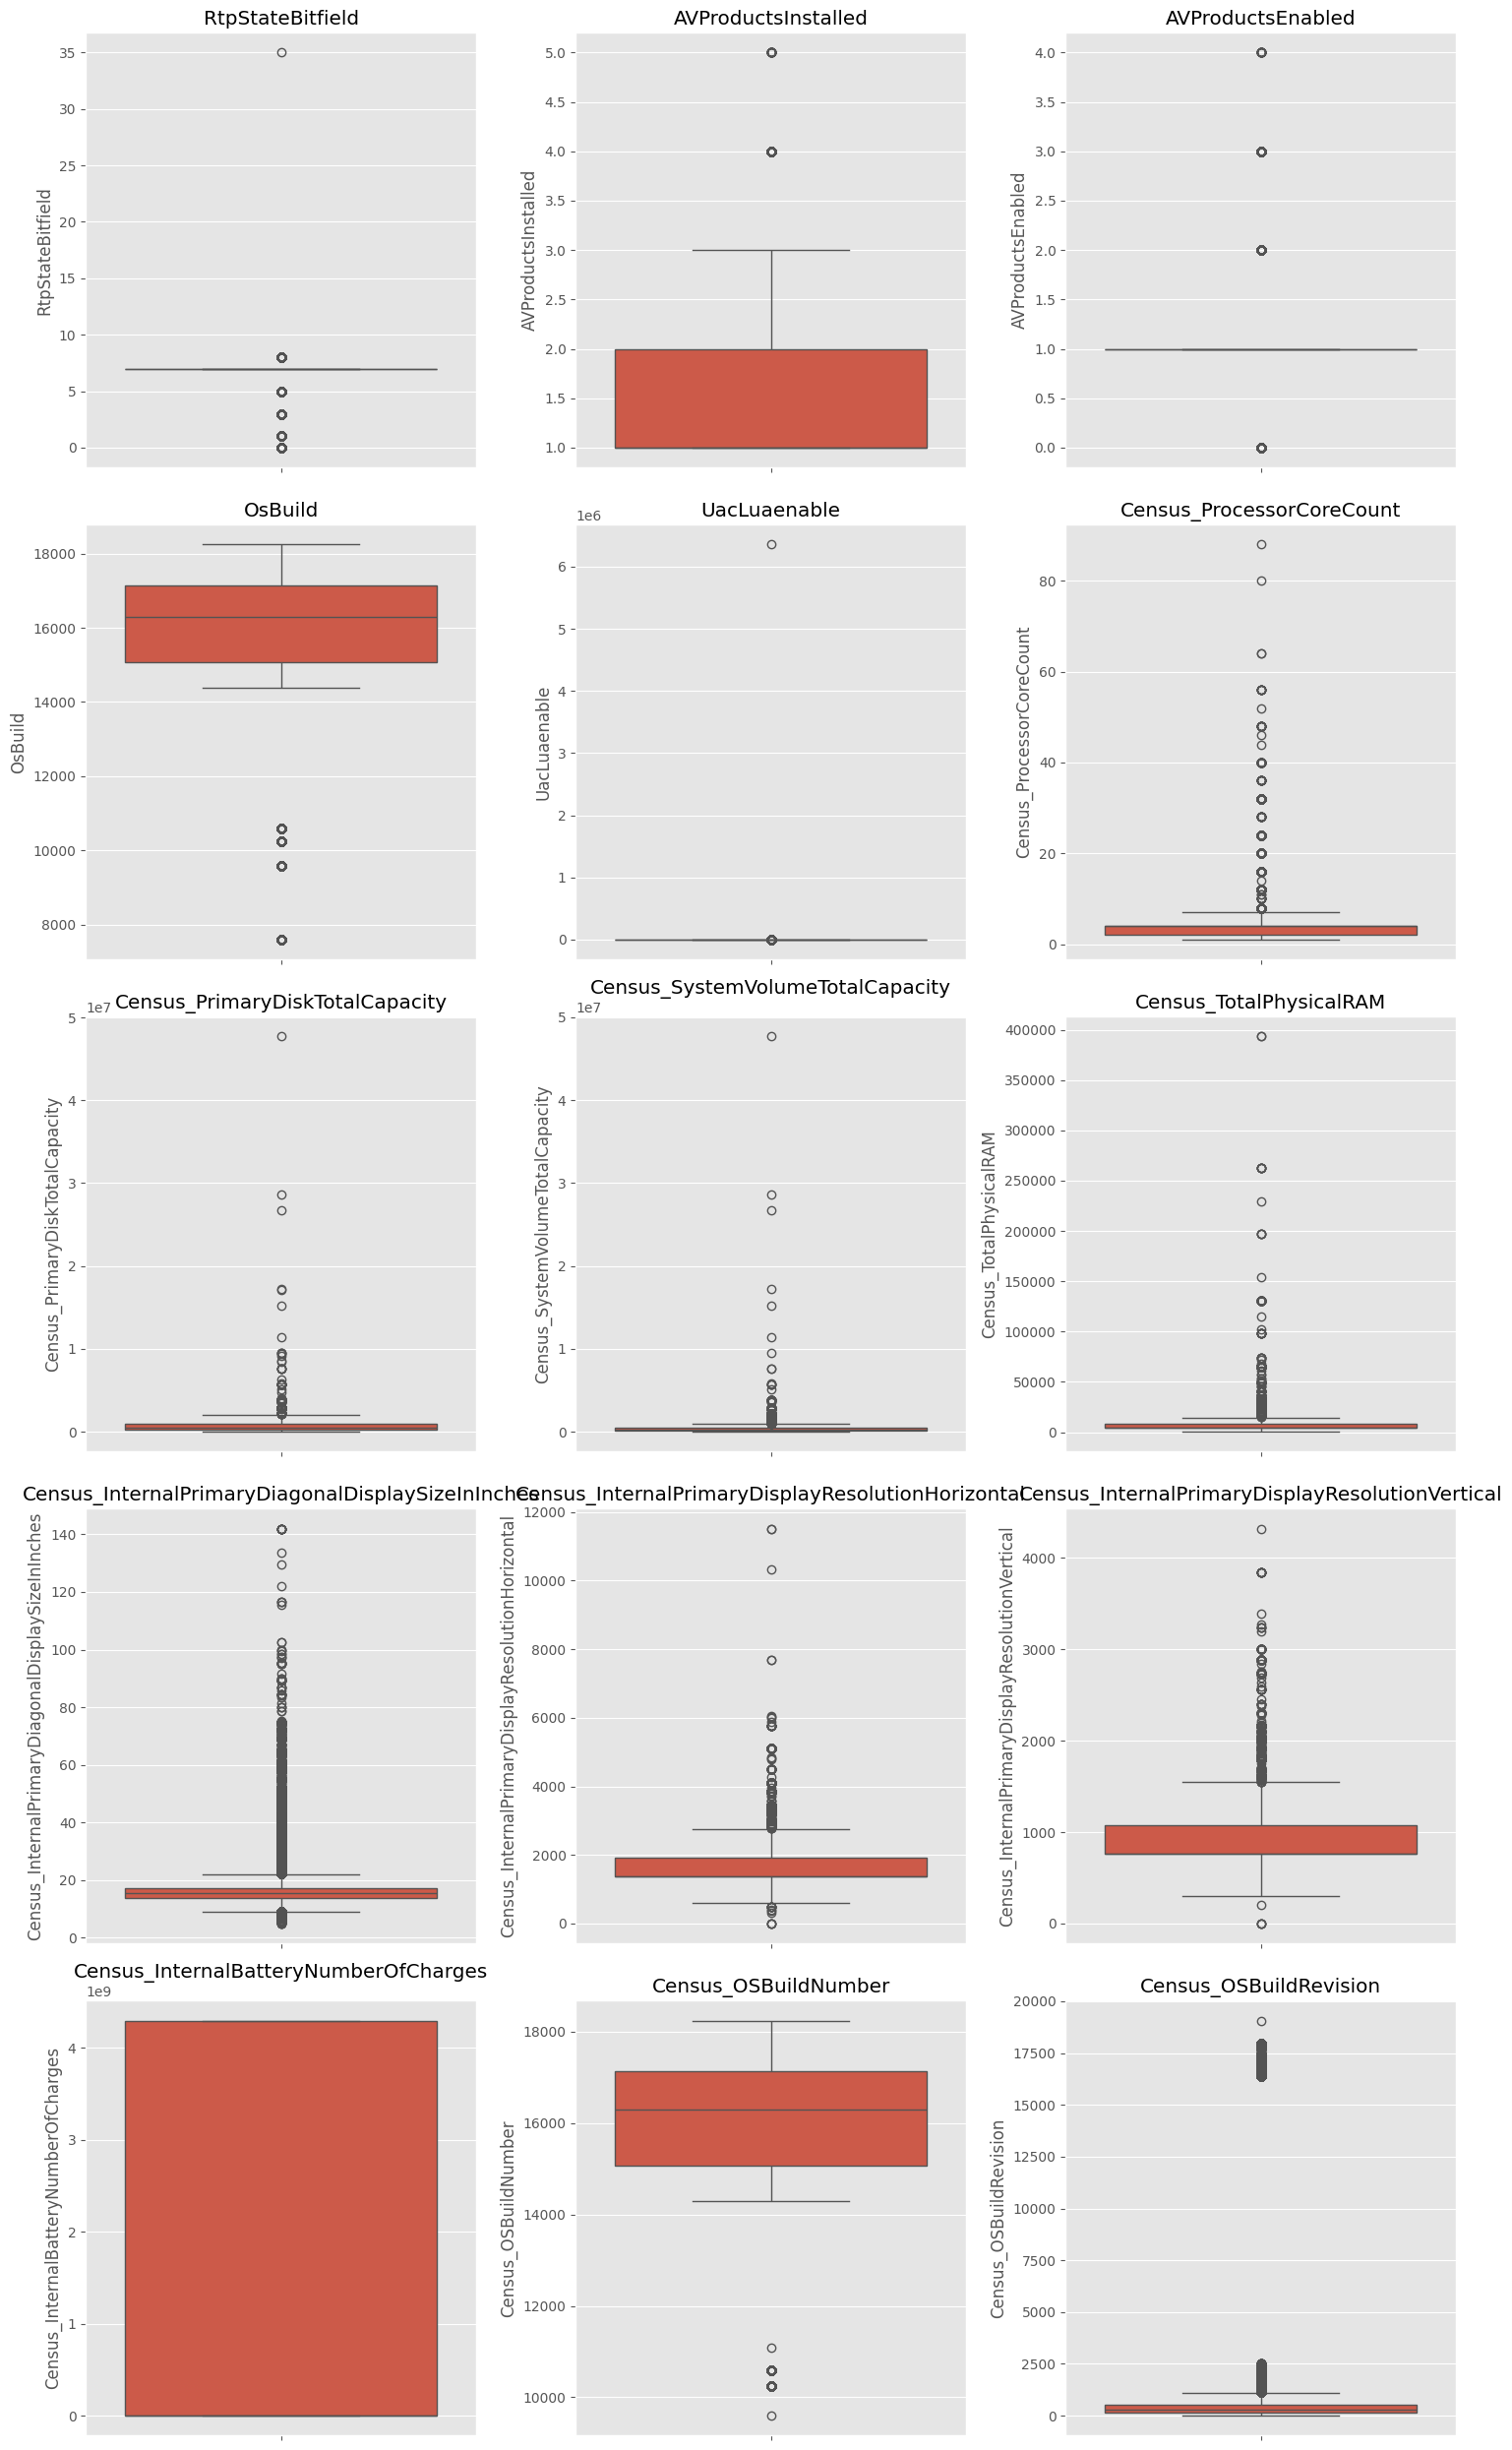

In [ ]:
#NUMERICAL COLUMNS
num_plots = len(num)
num_cols = 3  # 3 columnas por fila
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular el número de filas

plt.figure(figsize=(15, num_rows * 5))  # Ajustar el tamaño de la figura según el número de filas

# Crear un boxplot para cada columna numérica no binaria
for i, column in enumerate(num, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [ ]:
#Value counts para "RtpStateBitfield". 97% de valores iguales. ----> eliminar
df["RtpStateBitfield"].value_counts(normalize=True)*100

RtpStateBitfield
7.00    97.32
0.00     2.13
8.00     0.26
5.00     0.23
3.00     0.04
1.00     0.02
35.00    0.00
Name: proportion, dtype: float64

In [ ]:
df.drop("RtpStateBitfield", axis = 1, inplace = True)

In [ ]:
#Value counts para "UacLuaenable". <99% de los valores son 1. Dato erroneo de 6 millones  ----- > eliminar
df["UacLuaenable"].value_counts(normalize=True)*100

UacLuaenable
1.00           99.38
0.00            0.62
48.00           0.00
2.00            0.00
6,357,062.00    0.00
Name: proportion, dtype: float64

In [ ]:
df.drop("UacLuaenable", axis = 1, inplace = True)

In [ ]:
#Viendo valores altos de PrimaryDiskTotalCapacity.
df["Census_PrimaryDiskTotalCapacity"].sort_values(ascending=False)

MachineIdentifier
8ba24de0b102e9832b59fcf0cb6815a6   47,687,668.00
27579599190baaba77e36fc9abbb33b5   28,595,910.00
4bd73d982f24a017be0a26d45e0b3cfc   26,707,905.00
9adf055426b9dab35050f1ae5cc7d4fd   17,169,402.00
43f671b08a13ffa0b05340b904386776   17,166,135.00
                                        ...     
3edd5e2d309c874184fa1079d8f76b8f             NaN
628937e0eb5996d8f15905092d34dc72             NaN
97033e0bc7f83942556e667b2a4b3339             NaN
f891471b458ec18a4c249d83c0552a76             NaN
18c6c39bd18a1459ca2cfac1038bdf22             NaN
Name: Census_PrimaryDiskTotalCapacity, Length: 500000, dtype: float64

In [ ]:
#Pantalla de 142 pulgadas es MUY grande, pero puede llegar a ser real
df["Census_InternalPrimaryDiagonalDisplaySizeInInches"].sort_values(ascending=False)

MachineIdentifier
b38809232514c6e4a107b77bab3f0a6f   142.00
65d0bbf486534c23fcc1538d1547a2f0   142.00
0317be72c059b407dc89078918013167   142.00
2e1c55a4a84394319706547a79997237   142.00
af12705da2eb8f12e97de8897b4b50a2   142.00
                                    ...  
5c7562774ac5b55b1d7f71ccc56fd877      NaN
867c93616e791e4daa186423d1f25b70      NaN
8468b3f9106646940af2cf15750f0364      NaN
a3ad0724776b4a40ab16e15b30cd588a      NaN
27f58a2804fad12e52950b4b082e086f      NaN
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, Length: 500000, dtype: float64

In [ ]:
df["AVProductsEnabled"].value_counts(normalize=True)*100

AVProductsEnabled
1.00   97.41
2.00    2.22
0.00    0.29
3.00    0.06
4.00    0.01
Name: proportion, dtype: float64

In [ ]:
df["AVProductsInstalled"].value_counts(normalize=True)*100

AVProductsInstalled
1.00   69.88
2.00   27.68
3.00    2.33
4.00    0.10
5.00    0.01
Name: proportion, dtype: float64

In [ ]:
df["Census_TotalPhysicalRAM"].sort_values(ascending=False).head(20)

MachineIdentifier
8888c8eb58c011e6fe747ddb50ad2bfb   393,216.00
14ee28dc4d19691ec36d40697110b667   393,216.00
891f6a8d529dacb994b5d69afc444e0f   262,144.00
057d04efed99267c5b887d043afcc686   262,144.00
b66ef2ba7b68c755b10a3d6943eef7f6   262,144.00
660c5a8e22fa01b3897c24f266e9300e   262,144.00
da708a301a3fbaafb9cee87c2282ce83   262,144.00
b7e7e01e4e15c17e4df955acc50566c7   262,144.00
add911f0b9d5800bbf76d317e2d2182f   229,376.00
d502d95768b431ecb235a15300987bec   196,608.00
50491c325b6627b83d2e662eebc7dcdb   196,608.00
0ae88236428ab6b390d8bcd90115cbb3   196,608.00
ef17f9a539d40ea40c32a7f2e38cf31f   196,608.00
f8bd267862c022f146fbd44fe871acea   153,599.00
1cdc41b38d2d5392ca19c038933c1dea   131,072.00
7914a9ae664a616aeb9657152d5b57da   131,072.00
b8dc894cc4c696f8192f44ec9e9754ac   131,072.00
1e336f225e9f960307f83eb854f5bb8c   131,072.00
7e63945839bee9458ce96490b70ac293   131,072.00
9fed7eaa628577c9951aa9df450f8e1b   131,072.00
Name: Census_TotalPhysicalRAM, dtype: float64

Conclusions for Numerical Columns:
Since we will be using decision tree classifiers, we generally will not remove outliers, as they are not sensitive to them.

- **RtpStateBitfield:** The value of 35 stands out. Most values are concentrated at 7. It can be removed.
- **Census_InternalBatteryNumberOfCharges:** The data does not make sense (126436 records have charged the battery 4294967295 times). Remove.
- **UacLuaenable:** 99% of the values are 1. The word "Enable" suggests it is boolean, and values >1 are likely errors. Remove.
- **AVProductsInstalled:** Has 2 outliers.
- **AVProductsEnabled:** Almost all values are 1. There are 3 outliers.
- **Census_ProcessorCoreCount:** There are outliers. After investigating, high processor cores are found in servers and high-end workstations rather than home computers. Decide if we want to include them.
- **Census_PrimaryDiskTotalCapacity:** High values are normal in high-performance servers.
- **Census_SystemVolumeTotalCapacity:** The boxplot shows it behaves similarly to the previous variable.
- **Census_InternalPrimaryDiagonalDisplaySizeInInches:** There are outliers. There are very high, unusual values, but they don't necessarily have to be errors.
- **Census_InternalPrimaryDisplayResolutionHorizontal:** There are outliers. The minimum is -1 (error). Since we will remove it later, we will do nothing for now.
- **Census_InternalPrimaryDisplayResolutionVertical:** There are outliers. The minimum is -1 (error). Since we will remove it later, we will do nothing for now.







#### Booleans

Delete highly imbalanced columns in Data Preparation

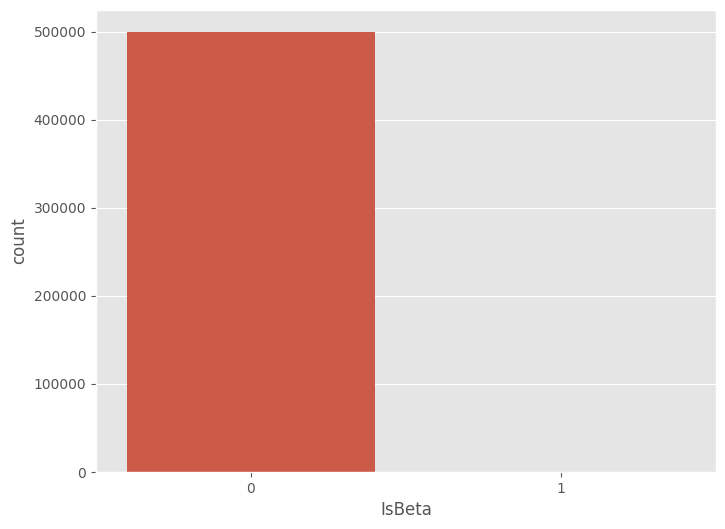

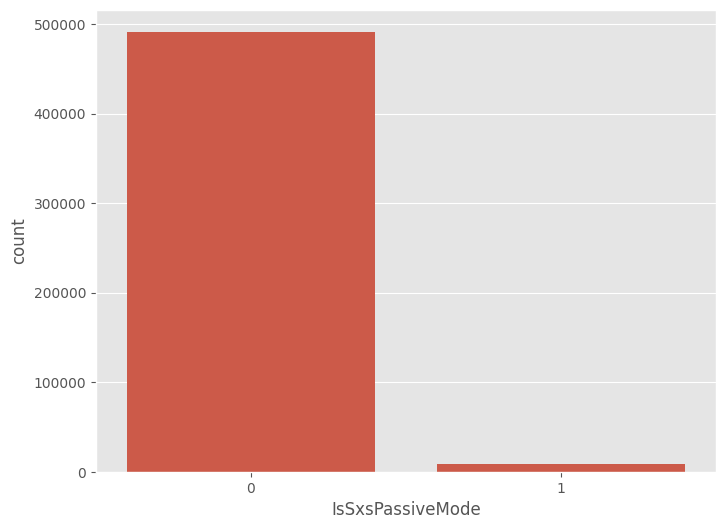

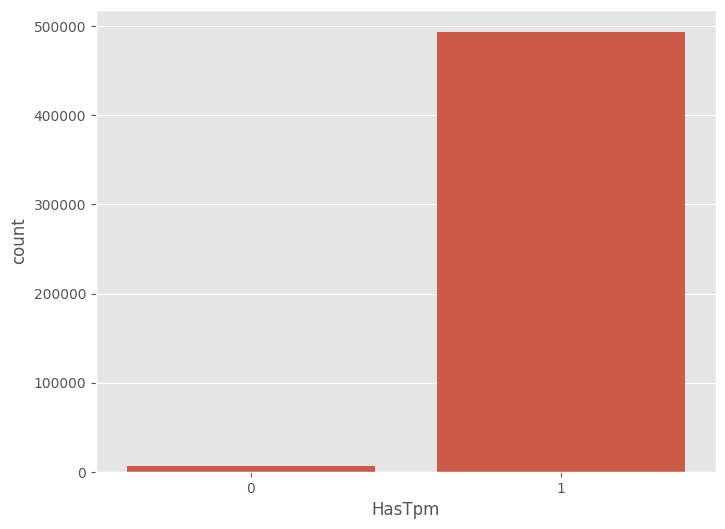

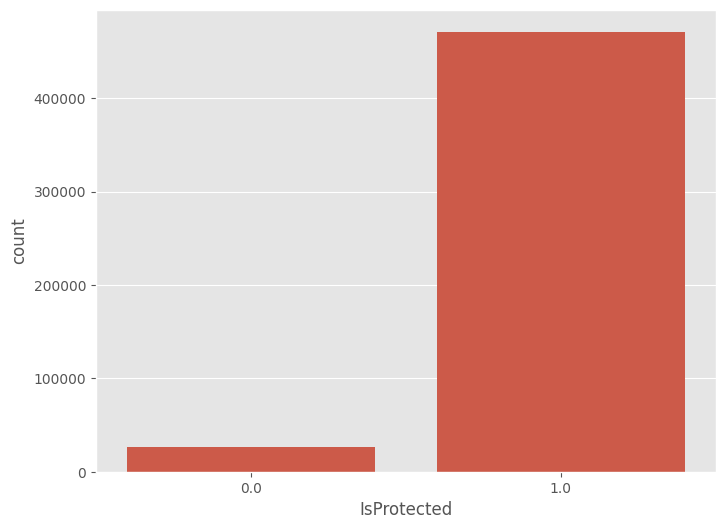

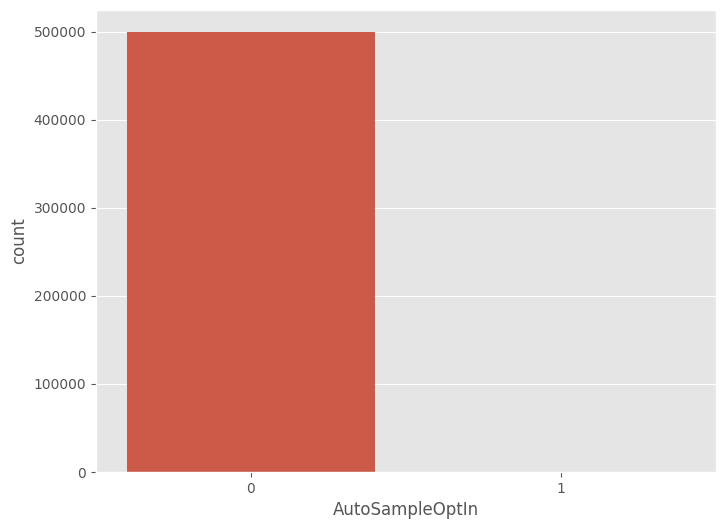

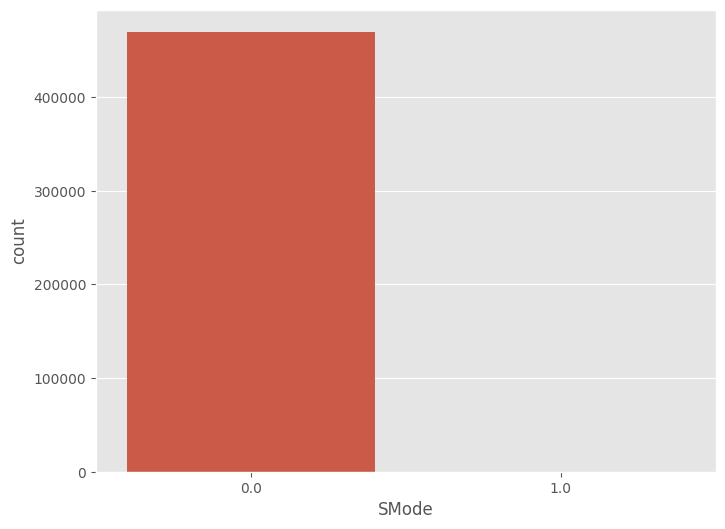

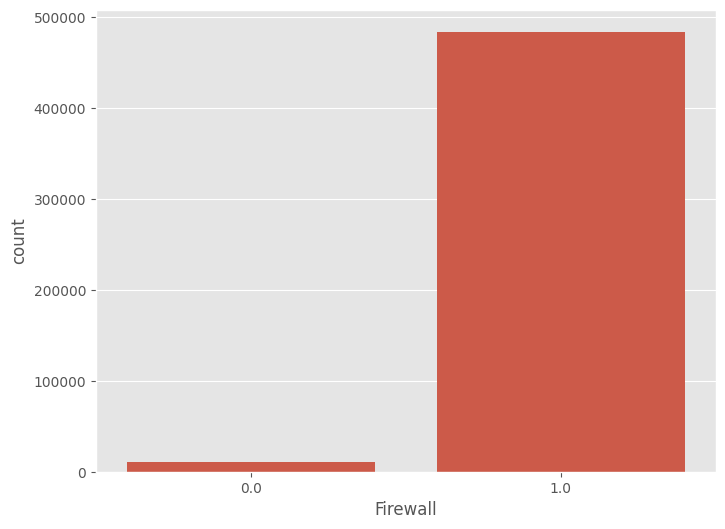

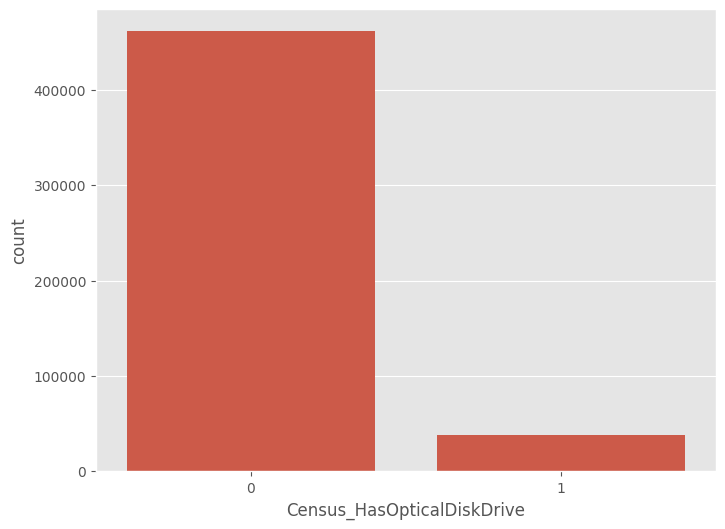

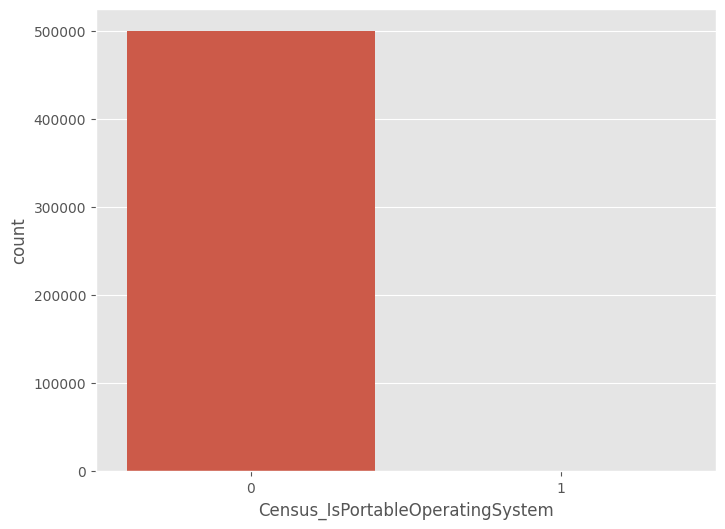

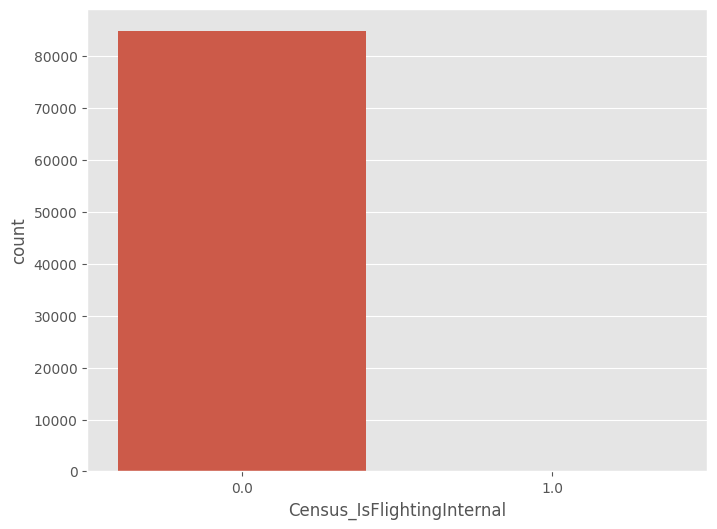

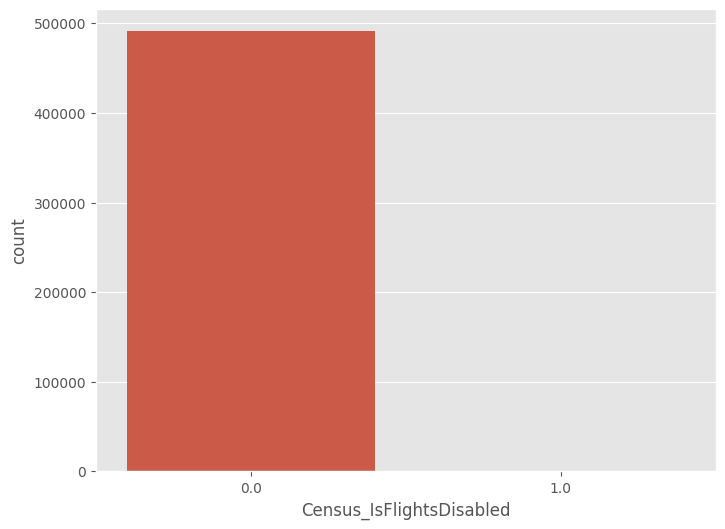

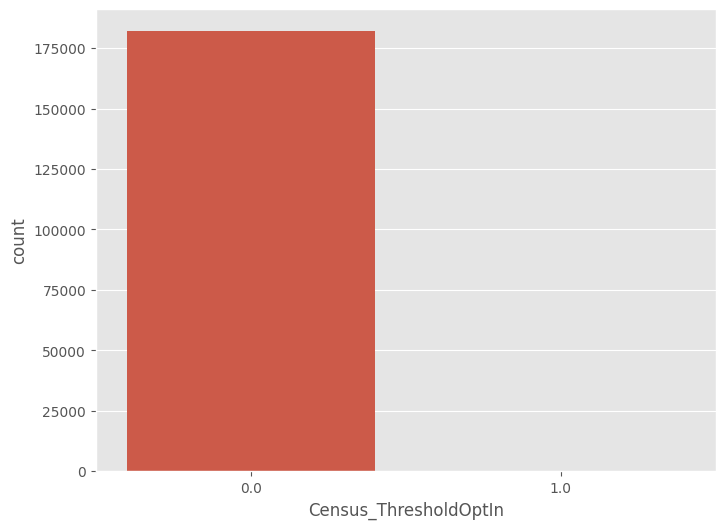

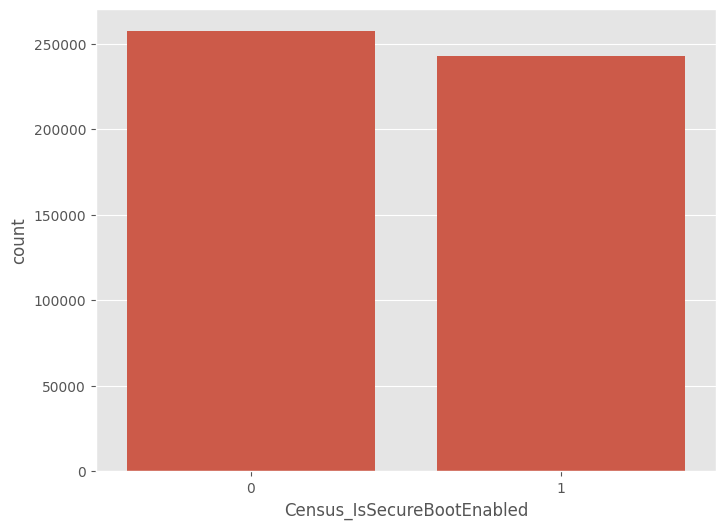

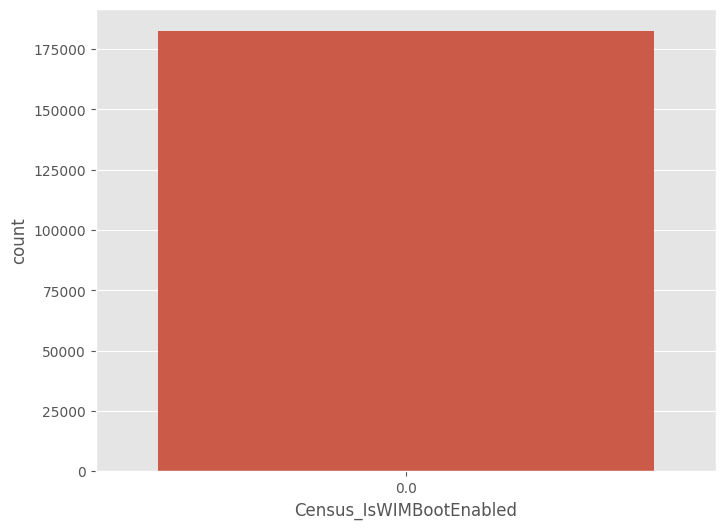

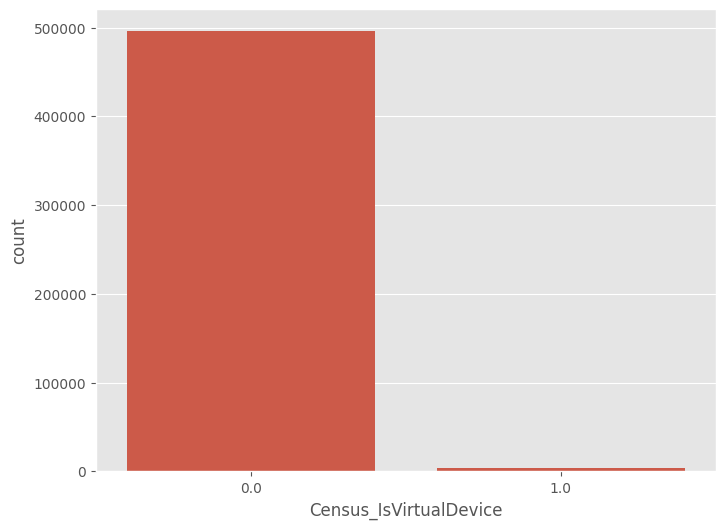

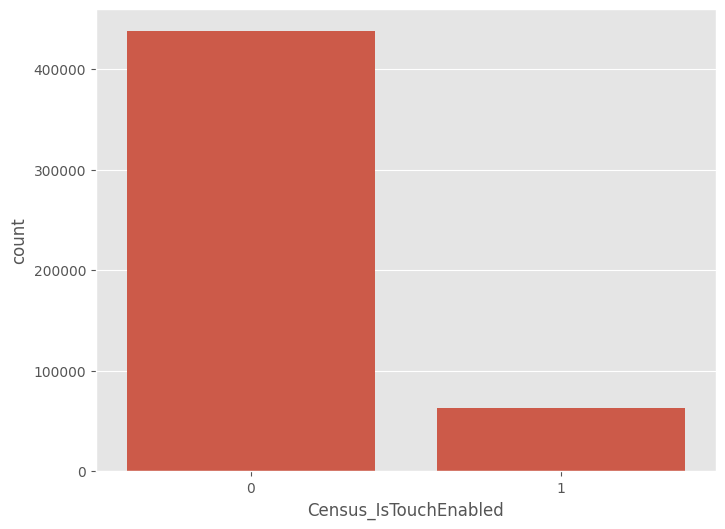

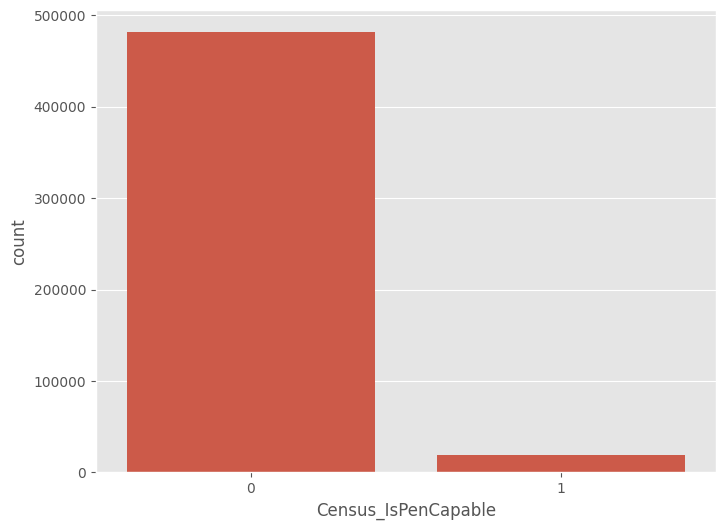

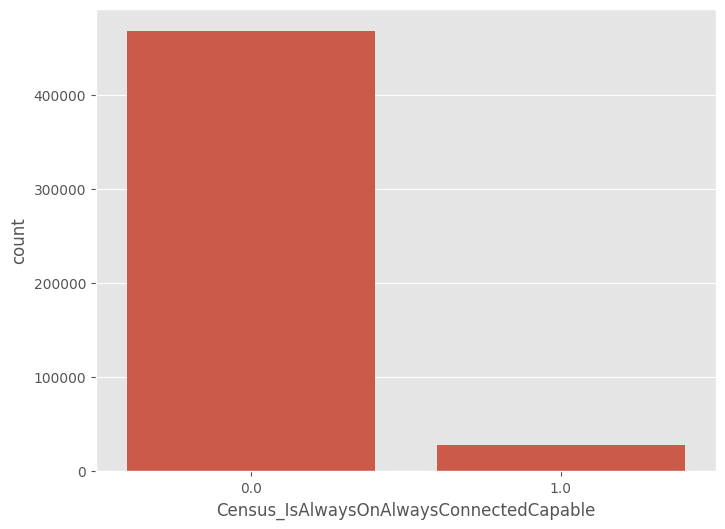

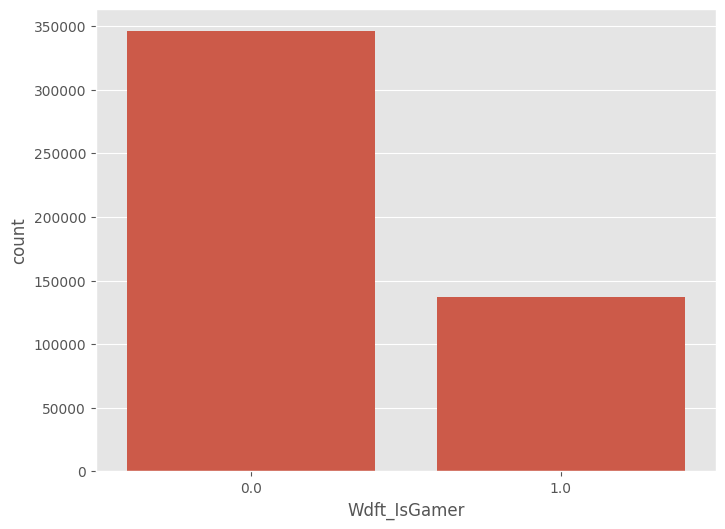

In [ ]:
for col in bol:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.xlabel(col)



### Correlation features vs. target

#### Booleans

In [ ]:
from scipy.stats import chi2_contingency
# We perform the confusion matrix and the chi-squared test to check the correlation with the target. We print those with the highest correlation to the target, p-value < 0.02.
for col in bol:
    contingency_table = pd.crosstab(df[col], df['HasDetections'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    if p <= 0.02:
        print(f'Variable: {col}, p-value: {p:.15f}')

Variable: IsSxsPassiveMode, p-value: 0.000000000000000
Variable: HasTpm, p-value: 0.000000383183770
Variable: IsProtected, p-value: 0.000000000000000
Variable: SMode, p-value: 0.000000000000000
Variable: Census_HasOpticalDiskDrive, p-value: 0.000000000000000
Variable: Census_IsVirtualDevice, p-value: 0.000000000000000
Variable: Census_IsTouchEnabled, p-value: 0.000000000000000
Variable: Census_IsPenCapable, p-value: 0.000000000000000
Variable: Census_IsAlwaysOnAlwaysConnectedCapable, p-value: 0.000000000000000
Variable: Wdft_IsGamer, p-value: 0.000000000000000


#### Numéricas

In [ ]:
# dataset mit numerical and booleans
numeric_cols = df.select_dtypes(include=['number']).columns
non_binary_numeric_cols = [col for col in numeric_cols if df[col].nunique() > 3 and col != 'HasDetections']
non_binary_numeric_cols.append('HasDetections')
num_TARGET = df[non_binary_numeric_cols]

In [ ]:
df_num_corr_pearson = num_TARGET.corr()['HasDetections']

In [ ]:
df_num_corr_pearson.sort_values()

AVProductsInstalled                                 -0.15
AVProductsEnabled                                   -0.04
Census_OSBuildRevision                              -0.01
Census_InternalPrimaryDisplayResolutionVertical      0.01
Census_SystemVolumeTotalCapacity                     0.01
Census_InternalBatteryNumberOfCharges                0.02
OsBuild                                              0.02
Census_OSBuildNumber                                 0.03
Census_InternalPrimaryDisplayResolutionHorizontal    0.03
Census_InternalPrimaryDiagonalDisplaySizeInInches    0.03
Census_PrimaryDiskTotalCapacity                      0.05
Census_ProcessorCoreCount                            0.06
Census_TotalPhysicalRAM                              0.06
HasDetections                                        1.00
Name: HasDetections, dtype: float64

The variables with the highest correlation to the target are:
- AVProductsEnabled (negative)
- AVProductsInstalled (negative)
- Census_ProcessorCoreCount
- Census_PrimaryDiskTotalCapacity
- Census_TotalPhysicalRAM

However, the correlation is still low.

#### Categorical

In [ ]:
from scipy.stats import chi2_contingency
# We perform the confusion matrix and the chi-squared test to check the correlation with the target. Since there are many columns and labels, we filter by those with a p-value of 0.02.
for column in cat:
    contingency_table = pd.crosstab(df[column], df['HasDetections'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    if p <= 0.02:
        print(f'Variable: {column}, p-value: {p:.10f}')


Variable: ProductName, p-value: 0.0023783809
Variable: EngineVersion, p-value: 0.0000000000
Variable: AppVersion, p-value: 0.0000000000
Variable: AvSigVersion, p-value: 0.0000000000
Variable: DefaultBrowsersIdentifier, p-value: 0.0000000000
Variable: AVProductStatesIdentifier, p-value: 0.0000000000
Variable: CountryIdentifier, p-value: 0.0000000000
Variable: CityIdentifier, p-value: 0.0000000000
Variable: OrganizationIdentifier, p-value: 0.0000000000
Variable: GeoNameIdentifier, p-value: 0.0000000000
Variable: LocaleEnglishNameIdentifier, p-value: 0.0000000000
Variable: Platform, p-value: 0.0000000000
Variable: Processor, p-value: 0.0000000000
Variable: OsVer, p-value: 0.0004580917
Variable: OsSuite, p-value: 0.0000000000
Variable: OsPlatformSubRelease, p-value: 0.0000000000
Variable: OsBuildLab, p-value: 0.0000000000
Variable: SkuEdition, p-value: 0.0000000000
Variable: IeVerIdentifier, p-value: 0.0000000000
Variable: SmartScreen, p-value: 0.0000000000
Variable: Census_MDC2FormFactor,

At this point, we cannot rule out the possibility of a correlation between these variables and the target.

## DATA_PREPARATION

In [ ]:
df1 = df.copy()

### Handling Null Values.

In [ ]:
#porecntaje de nulos
df1.isnull().sum()*100/df1.shape[0]

ProductName                                          0.00
EngineVersion                                        0.00
AppVersion                                           0.00
AvSigVersion                                         0.00
IsBeta                                               0.00
IsSxsPassiveMode                                     0.00
DefaultBrowsersIdentifier                           95.19
AVProductStatesIdentifier                            0.39
AVProductsInstalled                                  0.39
AVProductsEnabled                                    0.39
HasTpm                                               0.00
CountryIdentifier                                    0.00
CityIdentifier                                       3.65
OrganizationIdentifier                              30.91
GeoNameIdentifier                                    0.00
LocaleEnglishNameIdentifier                          0.00
Platform                                             0.00
Processor     

In [ ]:
# Remove columns with more than 95% null values.
columnas_eliminar_nulos = df1.columns[df1.isnull().sum()*100/df1.shape[0] > 95].tolist()
columnas_eliminar_nulos

['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass']

In [ ]:
df1.drop(columnas_eliminar_nulos, axis = 1, inplace = True)

In [ ]:
# The 3 columns with many null values, investigate if they are relevant:
# Census_IsFlightingInternal: It has no correlation with the target and very few true values. REMOVE.
# Census_ThresholdOptIn: REMOVE (for the same reason).
# Census_IsWIMBootEnabled: REMOVE (for the same reason).
# Census_InternalBatteryType: REMOVE.
df1.drop(["Census_IsFlightingInternal", "Census_ThresholdOptIn", "Census_IsWIMBootEnabled", "Census_InternalBatteryType"  ], axis = 1, inplace = True)

In [ ]:
df1.shape

(500000, 72)

In [ ]:
df1.isnull().sum()

ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
IsSxsPassiveMode                                          0
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
Platform                                                  0
Processor                               

In [ ]:
# Get lists of columns by type.
num1, bol1, cat1 = obtener_lista_variables(df1)

----

#### Categorical Variables: Replace nulls with "unknown". First, clean any existing "unknown" values.
- Group all variations of "unknown" (e.g., UNKNOWN, Unspecified, etc.) under "unknown".
- Additionally, if there is no variation to group in a column but the name is, for example, "UNKNOWN" in uppercase, change it to "unknown". This is because we will later impute nulls with "unknown", and this way we avoid duplicating categories.

In [ ]:
for col in cat1:
  print(f"{df1[col].value_counts()}\n\n")

ProductName
win8defender    494604
mse               5396
Name: count, dtype: int64


EngineVersion
1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13701.0       255
1.1.13704.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.12804.0         4
1.1.13802.0         

In [ ]:
# Census_PrimaryDiskTypeName: Group UNKNOWN and Unspecified into "unknown."
# Census_ChassisTypeName: Group Uknowns and UNKNOWN into "unknown."
# Census_PowerPlatformRoleName: Change "UNKNOWN" to "unknown."
# Census_OSWUAutoUpdateOptionsName: Change "UNKNOWN" to "unknown."
# Census_GenuineStateName: Change "UNKNOWN" to "unknown."
# Census_FlightRing: Change "Unknown" to "unknown."



In [ ]:
#Agrupo UNKNOWN, Unspecified  dentro de unknown.
df1['Census_PrimaryDiskTypeName'] = df1['Census_PrimaryDiskTypeName'].replace({ 'UNKNOWN': 'unknown', 'Unspecified': 'unknown'})

In [ ]:
#Agrupo Uknowns y UNKNOWN dentro de unknown
df1['Census_ChassisTypeName'].replace(['Unknown', 'UNKNOWN', "Other"], 'unknown', inplace=True)

C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\749814338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Census_ChassisTypeName'].replace(['Unknown', 'UNKNOWN', "Other"], 'unknown', inplace=True)


In [ ]:
#Paso UNKNOWN a de unknown
df1["Census_PowerPlatformRoleName"] = df1["Census_PowerPlatformRoleName"].replace({"UNKNOWN":"unknown"})

In [ ]:
#Paso UNKNOWN a unknown
df1["Census_OSWUAutoUpdateOptionsName"] = df1["Census_OSWUAutoUpdateOptionsName"].replace({"UNKNOWN":"unknown"})

In [ ]:
#Paso UNKNOWN a unknown
df1["Census_GenuineStateName"] = df1["Census_GenuineStateName"].replace({"UNKNOWN":"unknown"})

In [ ]:
#Paso Unknown a unknown
df1["Census_FlightRing"] = df1["Census_FlightRing"].replace({"Unknown":"unknown"})


In [ ]:
df1.shape

(500000, 72)

In [ ]:
df1[cat1].isnull().sum()

ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
AVProductStatesIdentifier                   1938
CountryIdentifier                              0
CityIdentifier                             18240
OrganizationIdentifier                    154563
GeoNameIdentifier                             16
LocaleEnglishNameIdentifier                    0
Platform                                       0
Processor                                      0
OsVer                                          0
OsSuite                                        0
OsPlatformSubRelease                           0
OsBuildLab                                     1
SkuEdition                                     0
IeVerIdentifier                             3209
SmartScreen                               178596
Census_MDC2FormFactor                          0
Census_DeviceFamily 

In [ ]:
for i in cat1:
  df1[i].fillna("unknown", inplace = True)

C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\1110595913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[i].fillna("unknown", inplace = True)


In [ ]:
df1[cat1].isnull().sum()

ProductName                               0
EngineVersion                             0
AppVersion                                0
AvSigVersion                              0
AVProductStatesIdentifier                 0
CountryIdentifier                         0
CityIdentifier                            0
OrganizationIdentifier                    0
GeoNameIdentifier                         0
LocaleEnglishNameIdentifier               0
Platform                                  0
Processor                                 0
OsVer                                     0
OsSuite                                   0
OsPlatformSubRelease                      0
OsBuildLab                                0
SkuEdition                                0
IeVerIdentifier                           0
SmartScreen                               0
Census_MDC2FormFactor                     0
Census_DeviceFamily                       0
Census_OEMNameIdentifier                  0
Census_OEMModelIdentifier       


#### Boolean Variables: Replace null values with the mode.

In [ ]:

df1[bol1].isnull().sum()

IsBeta                                         0
IsSxsPassiveMode                               0
HasTpm                                         0
IsProtected                                 1926
AutoSampleOptIn                                0
SMode                                      29848
Firewall                                    5162
Census_HasOpticalDiskDrive                     0
Census_IsPortableOperatingSystem               0
Census_IsFlightsDisabled                    8933
Census_IsSecureBootEnabled                     0
Census_IsVirtualDevice                       901
Census_IsTouchEnabled                          0
Census_IsPenCapable                            0
Census_IsAlwaysOnAlwaysConnectedCapable     4040
Wdft_IsGamer                               16950
dtype: int64

In [ ]:
for col in bol1:
  moda = df1[col].mode()[0]
  df1[col].fillna(moda, inplace = True)

C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\2465717027.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(moda, inplace = True)
C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\2465717027.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [ ]:
df1[bol1].isnull().sum()

IsBeta                                     0
IsSxsPassiveMode                           0
HasTpm                                     0
IsProtected                                0
AutoSampleOptIn                            0
SMode                                      0
Firewall                                   0
Census_HasOpticalDiskDrive                 0
Census_IsPortableOperatingSystem           0
Census_IsFlightsDisabled                   0
Census_IsSecureBootEnabled                 0
Census_IsVirtualDevice                     0
Census_IsTouchEnabled                      0
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
dtype: int64

In [ ]:
df1.shape

(500000, 72)

#### Numeric Variables: Replace null values with an extreme value (-9999). Remove nulls from _year and _month.

In [ ]:
# Numeric columns: Replace null values with an extreme value because we will use rule-based methods.
df1[num1].isnull().sum()

AVProductsInstalled                                   1938
AVProductsEnabled                                     1938
OsBuild                                                  0
Census_ProcessorCoreCount                             2347
Census_PrimaryDiskTotalCapacity                       2976
Census_SystemVolumeTotalCapacity                      2976
Census_TotalPhysicalRAM                               4556
Census_InternalPrimaryDiagonalDisplaySizeInInches     2654
Census_InternalPrimaryDisplayResolutionHorizontal     2650
Census_InternalPrimaryDisplayResolutionVertical       2650
Census_InternalBatteryNumberOfCharges                15038
Census_OSBuildNumber                                     0
Census_OSBuildRevision                                   0
dtype: int64

In [ ]:
df1[num1].isnull().sum()

AVProductsInstalled                                   1938
AVProductsEnabled                                     1938
OsBuild                                                  0
Census_ProcessorCoreCount                             2347
Census_PrimaryDiskTotalCapacity                       2976
Census_SystemVolumeTotalCapacity                      2976
Census_TotalPhysicalRAM                               4556
Census_InternalPrimaryDiagonalDisplaySizeInInches     2654
Census_InternalPrimaryDisplayResolutionHorizontal     2650
Census_InternalPrimaryDisplayResolutionVertical       2650
Census_InternalBatteryNumberOfCharges                15038
Census_OSBuildNumber                                     0
Census_OSBuildRevision                                   0
dtype: int64

In [ ]:
df1.fillna(value = -9999, inplace = True)

In [ ]:
df1[num1].isnull().sum()

AVProductsInstalled                                  0
AVProductsEnabled                                    0
OsBuild                                              0
Census_ProcessorCoreCount                            0
Census_PrimaryDiskTotalCapacity                      0
Census_SystemVolumeTotalCapacity                     0
Census_TotalPhysicalRAM                              0
Census_InternalPrimaryDiagonalDisplaySizeInInches    0
Census_InternalPrimaryDisplayResolutionHorizontal    0
Census_InternalPrimaryDisplayResolutionVertical      0
Census_InternalBatteryNumberOfCharges                0
Census_OSBuildNumber                                 0
Census_OSBuildRevision                               0
dtype: int64

In [ ]:

df1.isnull().sum()

ProductName                                          0
EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
IsBeta                                               0
IsSxsPassiveMode                                     0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
Platform                                             0
Processor                                            0
OsVer                                                0
OsBuild   

### Remove columns with low variance.

In [ ]:
#categorical
cat_describe = df1[cat1].describe().T

In [ ]:
cat_describe

,count,unique,top,freq
ProductName,500000,2,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
AVProductStatesIdentifier,"500,000.00","5,517.00","53,447.00","326,463.00"
CountryIdentifier,500000,222,43,22339
CityIdentifier,500000,37158,unknown,18240
OrganizationIdentifier,"500,000.00",45.00,27.00,"234,885.00"
GeoNameIdentifier,"500,000.00",269.00,277.00,"86,080.00"
LocaleEnglishNameIdentifier,500000,233,75,117818


In [ ]:
# Remove those columns where the number of records in the majority category (freq) is greater than the number of rows minus the categorical variance threshold (umbral_varianza_cat).
umbral_varianza_cat = 25000

In [ ]:
cat_poca_varianza = df1[cat1].columns[cat_describe.freq > df1.shape[0]-umbral_varianza_cat].tolist()
cat_poca_varianza


['ProductName', 'Platform', 'OsVer', 'Census_DeviceFamily']

In [ ]:
df1.drop(cat_poca_varianza, axis = 1, inplace = True)

In [ ]:
df1.shape

(500000, 68)

In [ ]:
#booleanas
bol_describe = df1[bol1].describe().T
bol_describe

,count,mean,std,min,25%,50%,75%,max
IsBeta,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00
IsSxsPassiveMode,"500,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
HasTpm,"500,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00
IsProtected,"500,000.00",0.95,0.23,0.00,1.00,1.00,1.00,1.00
AutoSampleOptIn,"500,000.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
SMode,"500,000.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00
Firewall,"500,000.00",0.98,0.15,0.00,1.00,1.00,1.00,1.00
Census_HasOpticalDiskDrive,"500,000.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
Census_IsPortableOperatingSystem,"500,000.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00
Census_IsFlightsDisabled,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
bol_describe["mean"]

IsBeta                                    0.00
IsSxsPassiveMode                          0.02
HasTpm                                    0.99
IsProtected                               0.95
AutoSampleOptIn                           0.00
SMode                                     0.00
Firewall                                  0.98
Census_HasOpticalDiskDrive                0.08
Census_IsPortableOperatingSystem          0.00
Census_IsFlightsDisabled                  0.00
Census_IsSecureBootEnabled                0.49
Census_IsVirtualDevice                    0.01
Census_IsTouchEnabled                     0.13
Census_IsPenCapable                       0.04
Census_IsAlwaysOnAlwaysConnectedCapable   0.06
Wdft_IsGamer                              0.27
Name: mean, dtype: float64

In [ ]:
# Boolean variables: Remove those where the mean is less than 0.05 or greater than 0.95.
bol_poca_varianza = bol_describe[ bol_describe["mean"] > 0.95  ].index.tolist() + bol_describe[ bol_describe["mean"] < 0.05  ].index.tolist()
bol_poca_varianza


['HasTpm',
 'Firewall',
 'IsBeta',
 'IsSxsPassiveMode',
 'AutoSampleOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_IsVirtualDevice',
 'Census_IsPenCapable']

In [ ]:
df1.drop(bol_poca_varianza, axis = 1, inplace = True)

In [ ]:
df1.shape

(500000, 58)

In [ ]:
#numericas
num_describe = df1[num1].describe().T
bol_describe

,count,mean,std,min,25%,50%,75%,max
IsBeta,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00
IsSxsPassiveMode,"500,000.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
HasTpm,"500,000.00",0.99,0.11,0.00,1.00,1.00,1.00,1.00
IsProtected,"500,000.00",0.95,0.23,0.00,1.00,1.00,1.00,1.00
AutoSampleOptIn,"500,000.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
SMode,"500,000.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00
Firewall,"500,000.00",0.98,0.15,0.00,1.00,1.00,1.00,1.00
Census_HasOpticalDiskDrive,"500,000.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
Census_IsPortableOperatingSystem,"500,000.00",0.00,0.02,0.00,0.00,0.00,0.00,1.00
Census_IsFlightsDisabled,"500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [ ]:
# Numeric variables: Remove those where the standard deviation (std) is less than 0.05.
umbral_varianza_num = 0.05

In [ ]:
num_describe["std"]

AVProductsInstalled                                           621.39
AVProductsEnabled                                             621.37
OsBuild                                                     2,188.65
Census_ProcessorCoreCount                                     683.73
Census_PrimaryDiskTotalCapacity                           371,535.81
Census_SystemVolumeTotalCapacity                          338,780.92
Census_TotalPhysicalRAM                                     5,174.02
Census_InternalPrimaryDiagonalDisplaySizeInInches             727.79
Census_InternalPrimaryDisplayResolutionHorizontal             915.47
Census_InternalPrimaryDisplayResolutionVertical               819.73
Census_InternalBatteryNumberOfCharges               1,870,056,624.67
Census_OSBuildNumber                                        1,959.44
Census_OSBuildRevision                                      2,920.63
Name: std, dtype: float64

In [ ]:
num_poca_varianza = num_describe[num_describe["std"] < umbral_varianza_num].index.tolist()
num_poca_varianza


[]

In [ ]:
df1.drop(num_poca_varianza, axis = 1, inplace = True)

In [ ]:
df1.shape

(500000, 58)

### Remove columns that are highly correlated with each other. Also, remove columns that have little to no correlation with the target.

In [ ]:
df2 = df1.copy()

In [ ]:
#obtener listas de columnas por tipo
num2, bol2, cat2 = obtener_lista_variables(df2)

In [ ]:
df2[num2 + bol2 + ["HasDetections"]].head().T

MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5,06ca8fa8d32c2abdc5b3577d676b3269
AVProductsInstalled,1.00,1.00,2.00,1.00,2.00
AVProductsEnabled,1.00,1.00,1.00,1.00,1.00
OsBuild,"17,134.00","17,134.00","10,586.00","17,134.00","17,134.00"
Census_ProcessorCoreCount,4.00,4.00,4.00,8.00,4.00
Census_PrimaryDiskTotalCapacity,"953,869.00","476,940.00","244,198.00","228,936.00","476,940.00"
Census_SystemVolumeTotalCapacity,"952,838.00","457,600.00","221,251.00","228,321.00","464,374.00"
Census_TotalPhysicalRAM,"8,192.00","8,192.00","8,192.00","8,192.00","4,096.00"
Census_InternalPrimaryDiagonalDisplaySizeInInches,23.00,13.20,15.50,15.50,15.50
Census_InternalPrimaryDisplayResolutionHorizontal,"1,920.00","1,280.00","1,920.00","1,920.00","1,366.00"
Census_InternalPrimaryDisplayResolutionVertical,"1,080.00",720.00,"1,080.00","1,080.00",768.00


<Axes: >

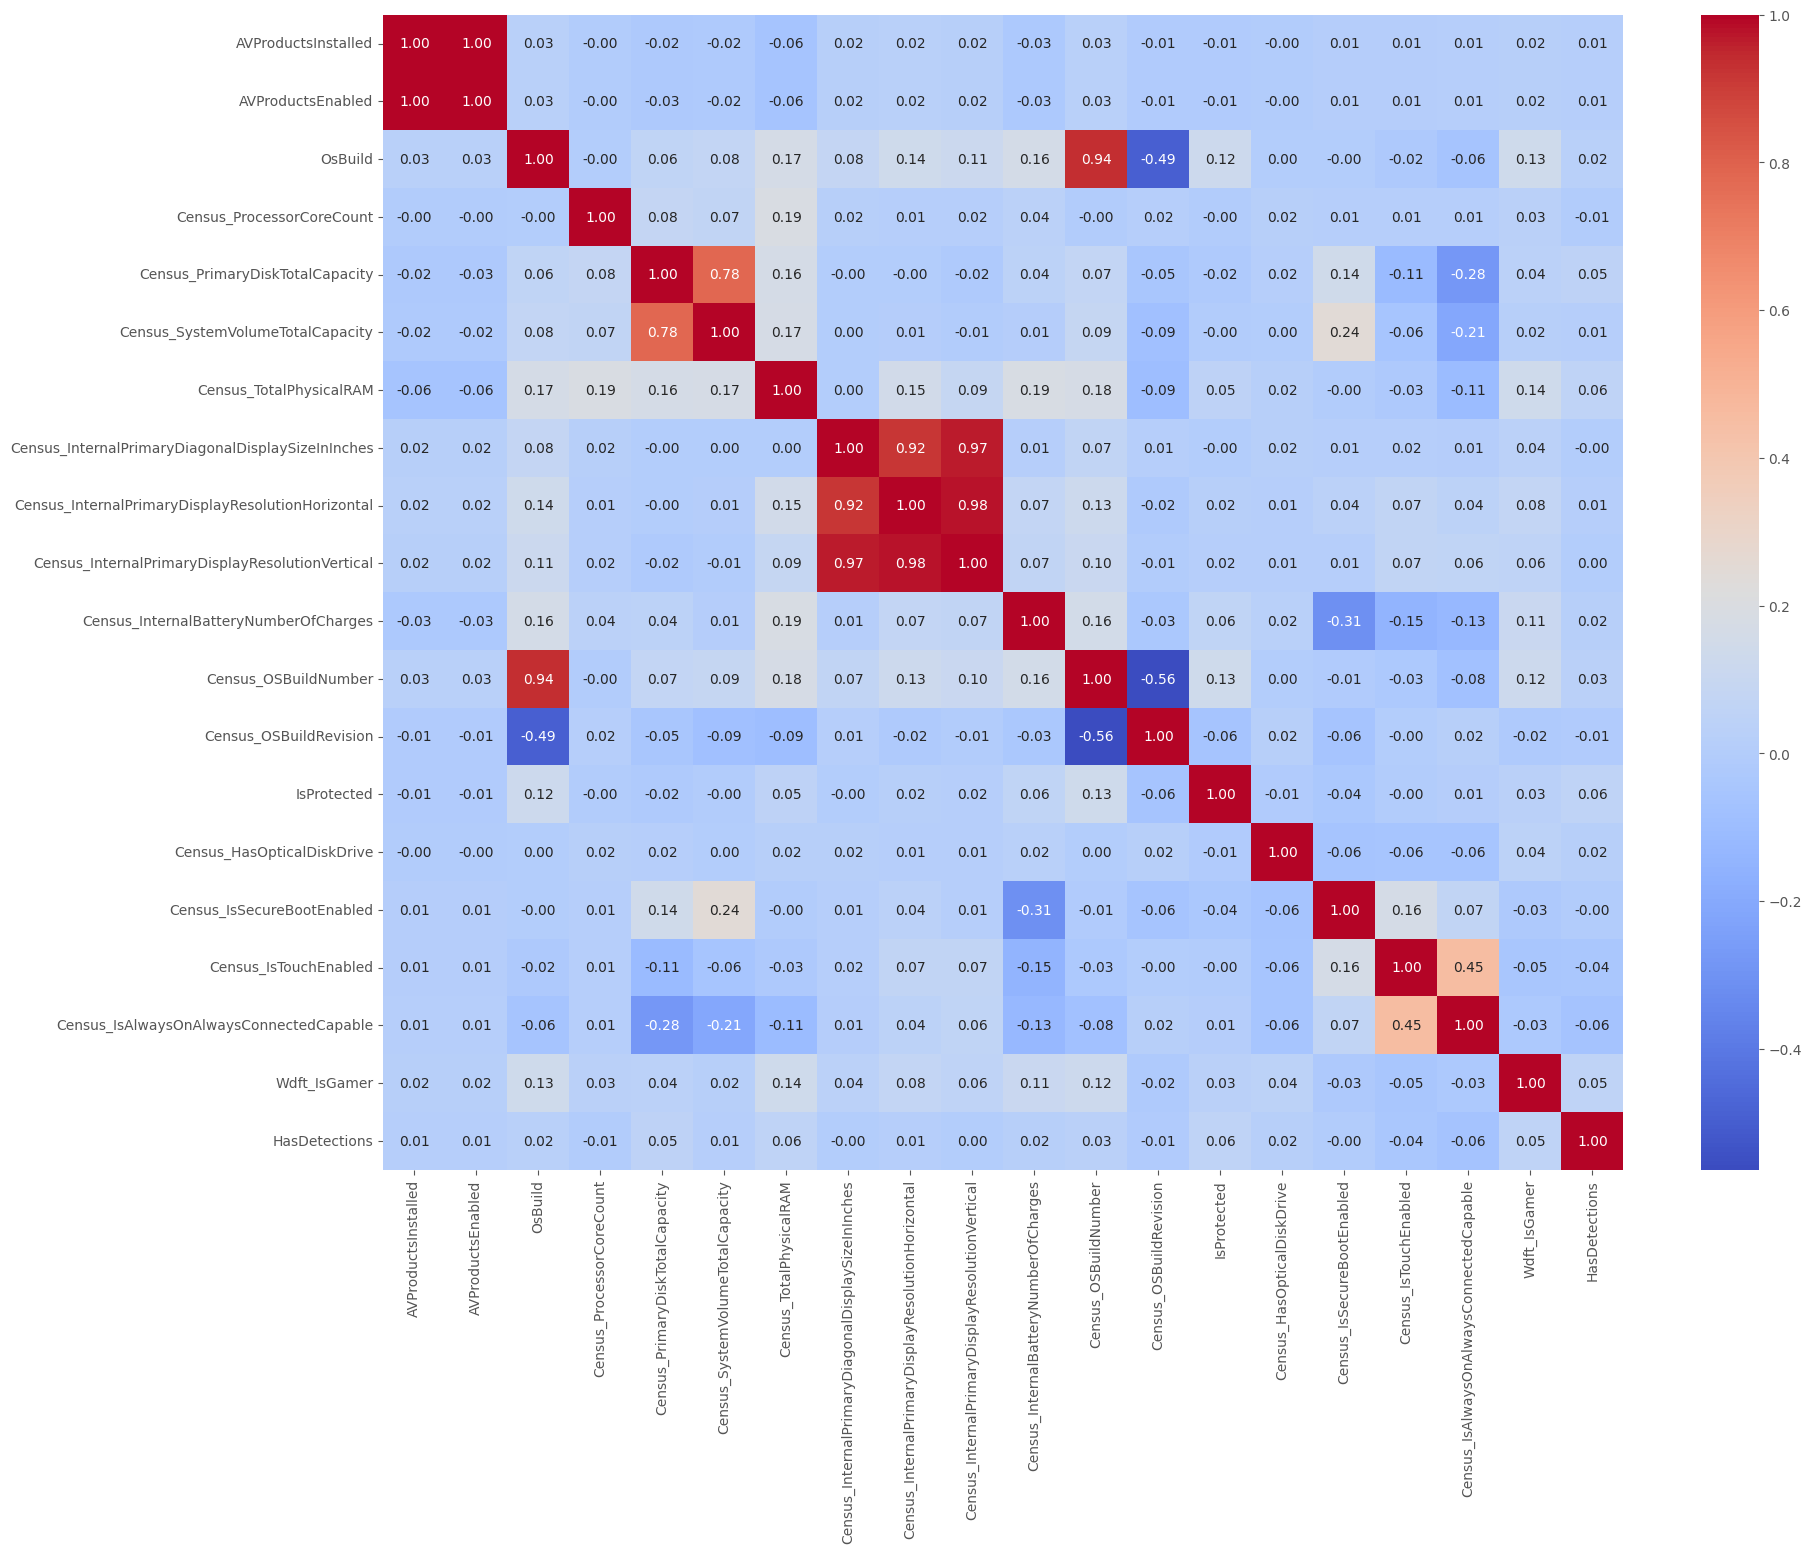

In [ ]:
# Numeric and Boolean:
# Remove one of the columns that correlate with each other > 0.9:
# AVProductsInstalled, OsBuild, Census_InternalPrimaryDisplayResolutionHorizontal, Census_InternalPrimaryDisplayResolutionVertical.
corr_matriz_num = df2[num2 + bol2 + ["HasDetections"]].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matriz_num, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
df2.drop(["AVProductsInstalled", "OsBuild", "Census_InternalPrimaryDisplayResolutionHorizontal", "Census_InternalPrimaryDisplayResolutionVertical", "Census_InternalPrimaryDiagonalDisplaySizeInInches"], axis = 1, inplace = True)

In [ ]:
df2.shape

(500000, 53)

### Transformation of Categorical Variables


#### Transform columns with "Versions" to numeric.

In [ ]:
#First, transform "Version" columns to numeric because they have an inherent order.
# List "Version" columns.
col_version = df2.loc[:, df2.columns.str.contains("Version$|Ver$", regex=True)].columns.to_list()
#col_version = ['EngineVersion', 'AppVersion', 'AvSigVersion', 'OsVer', 'Census_OSVersion']
col_version

['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion']

In [ ]:
# Function to transform version columns: Split by dots, pad with zeros up to 5 positions, and then join them.

def version_a_numerica(version):
    partes = version.split('.')

    while len(partes) < 4:
        partes.append('0')

    valor_num = ''.join(f'{int(part):05}' for part in partes)
    return int(valor_num)


In [ ]:
for i in col_version:
  df2[i] = df2[i].apply(version_a_numerica)


In [ ]:
df2[col_version].head().T

MachineIdentifier,f1cd864e97bae82bdf96523e1a539121,fd5ba6f5b75325ec0423a6c67cc75942,4e628391e7cc7c482fb3286f486dbd25,270a2e9d028144a4df12a9e3da79fba5,06ca8fa8d32c2abdc5b3577d676b3269
EngineVersion,1000011510000001,1000011510000001,1000011510000001,1000011520000001,1000011520000001
AppVersion,4000180180718075,4000180180718075,4000091058601106,4000180180718075,4000180180718075
AvSigVersion,1002730123400000,1002730128200000,1002730078100000,1002750163900000,1002750051100000
Census_OSVersion,10000001713400165,10000001713400165,10000001058601176,10000001713400286,10000001713400228


In [ ]:
df2[col_version].dtypes

EngineVersion       int64
AppVersion          int64
AvSigVersion        int64
Census_OSVersion    int64
dtype: object

#### Transformation of remaining categorical variables

In [ ]:
df3 = df2.copy()

In [ ]:
#sacar columnas por tipo
num3, bol3, cat3 = obtener_lista_variables(df3)

In [ ]:
len(df3[cat3].nunique())

34

In [ ]:
df3[cat3].nunique()

AVProductStatesIdentifier                  5517
CountryIdentifier                           222
CityIdentifier                            37158
OrganizationIdentifier                       45
GeoNameIdentifier                           269
LocaleEnglishNameIdentifier                 233
Processor                                     3
OsSuite                                       9
OsPlatformSubRelease                          9
OsBuildLab                                  454
SkuEdition                                    8
IeVerIdentifier                             180
SmartScreen                                  13
Census_MDC2FormFactor                        12
Census_OEMNameIdentifier                   1590
Census_OEMModelIdentifier                 40698
Census_ProcessorManufacturerIdentifier        5
Census_ProcessorModelIdentifier            2244
Census_PrimaryDiskTypeName                    3
Census_ChassisTypeName                       32
Census_PowerPlatformRoleName            

#### Transformation of remaining categorical variables

Transform categorical variables with more than 100 categories using frequency encoding. For the rest, use One-Hot Encoding (OHE).

In [ ]:

def frequency_encoding(dataframe, columns):
    for col in columns:
        frequency_encoding = dataframe[col].value_counts()
        dataframe[col + '_encoded'] = dataframe[col].map(frequency_encoding)
        dataframe.drop(col, axis = 1, inplace = True)
    return dataframe


In [ ]:
#lista de columnas con más de 100 categorias
cat_frecuency_encoding = [col for col in df3.select_dtypes(include = ["object"]).columns if  df3[col].nunique() >= 100]
#frecuency encoding
df3 = frequency_encoding(df3, cat_frecuency_encoding)
#sacar columnas por tipo
num3, bol3, cat3 = obtener_lista_variables(df3)

df3[cat3].nunique()


OrganizationIdentifier                    45
Processor                                  3
OsSuite                                    9
OsPlatformSubRelease                       9
SkuEdition                                 8
SmartScreen                               13
Census_MDC2FormFactor                     12
Census_ProcessorManufacturerIdentifier     5
Census_PrimaryDiskTypeName                 3
Census_ChassisTypeName                    32
Census_PowerPlatformRoleName               9
Census_OSArchitecture                      3
Census_OSBranch                           15
Census_OSEdition                          22
Census_OSSkuName                          21
Census_OSInstallTypeName                   9
Census_OSInstallLanguageIdentifier        40
Census_OSWUAutoUpdateOptionsName           6
Census_GenuineStateName                    4
Census_ActivationChannel                   6
Census_FlightRing                          8
Wdft_RegionIdentifier                     16
dtype: int

##### OPCION 2: Agrupar categorias con menos de 1000 registros para todas las variables. Y luego OHE a todas.

In [ ]:
#OPCIÓN 2: agota la RAM
#agrupar categorias con menos de 1000 registros
""""
df3 = df2.copy()

for col in df3[cat3].columns:
    counts = df3[col].value_counts()
    categoras_agrupar = counts[counts < 1000].index
    df3[col] = df3[col].apply(lambda x: 'Otros' if x in categoras_agrupar else x)

df3[cat3].nunique()
"""

'"\ndf3 = df2.copy()\n\nfor col in df3[cat3].columns:\n    counts = df3[col].value_counts()\n    categoras_agrupar = counts[counts < 1000].index\n    df3[col] = df3[col].apply(lambda x: \'Otros\' if x in categoras_agrupar else x)\n\ndf3[cat3].nunique()\n'

In [ ]:
len(df3[cat3].nunique())

22

##### OPCION 3: Agrupar categorías de las columnas categóricas quedándonos con las n categorías con más valores. Y luego OHE a todas

In [ ]:
#OPCIÓN 3:
#agrupar categorias quedandome con las n categorías con más valores. Y luego OHE
'''
df3 = df2.copy()

n_top= 20 #numero de categorias top que nos quedamos
cat_agrupar = [col for col in df3[cat3].columns if  df3[col].nunique() >= n_top]

for col in df3[cat_agrupar].columns:
    categorias_agrupar = df3[col].value_counts().head(n_top).index.to_list()
    df3[col] = pd.Categorical(df3[col], categories=categorias_agrupar)
    df3[col] = df3[col].astype("object")
    df3[col].fillna("others", inplace = True)

df3[cat3].nunique()
'''

'\ndf3 = df2.copy()\n\nn_top= 20 #numero de categorias top que nos quedamos\ncat_agrupar = [col for col in df3[cat3].columns if  df3[col].nunique() >= n_top]\n\nfor col in df3[cat_agrupar].columns:\n    categorias_agrupar = df3[col].value_counts().head(n_top).index.to_list()\n    df3[col] = pd.Categorical(df3[col], categories=categorias_agrupar)\n    df3[col] = df3[col].astype("object")\n    df3[col].fillna("others", inplace = True)\n\ndf3[cat3].nunique()\n'

##### OPCION 4: Agrupar categorías con menos de 1000 registros para todas las categóricas. Y luego OHE a todas.

In [ ]:
#OPCIÓN 4:
#Agrupar categorías con menos de 1000 registros para todas las categóricas
"""
df3 = df2.copy()

for col in cat3:
    counts = df3[col].value_counts()
    categorias_agrupar = counts[counts < 1000].index
    df3[col] = df3[col].apply(lambda x: 'Otros' if x in categorias_agrupar else x)

df3[cat3].nunique()
"""


"\ndf3 = df2.copy()\n\nfor col in cat3:\n    counts = df3[col].value_counts()\n    categorias_agrupar = counts[counts < 1000].index\n    df3[col] = df3[col].apply(lambda x: 'Otros' if x in categorias_agrupar else x)\n\ndf3[cat3].nunique()\n"

#### OHE

In [ ]:
df4 = df3.copy()

In [ ]:
df4.shape

(500000, 53)

In [ ]:
#sacar columnas por tipo
num4, bol4, cat4 = obtener_lista_variables(df4)

In [ ]:
df[cat4].info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 22 entries, OrganizationIdentifier to Wdft_RegionIdentifier
dtypes: object(22)
memory usage: 103.9+ MB


In [ ]:
#funcion hacer OHE
def OHE(dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe, _dummy_dataset], axis=1)
    return dataframe.drop(column_name, axis=1)

In [ ]:
#hacemos el OHE a todas las categóricas
df4 = OHE(df4, cat4)

In [ ]:
#comprobar que no quedan columnas tipo "object"
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 329 entries, EngineVersion to Wdft_RegionIdentifier_unknown
dtypes: bool(298), float64(9), int64(22)
memory usage: 280.3+ MB


### Transformation of booleans

In [ ]:
df4.shape

(500000, 329)

In [ ]:
bol4


['IsProtected',
 'Census_HasOpticalDiskDrive',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

In [ ]:
def transformar_bool (df4):
  bool_col=df4.select_dtypes(include=["bool"]).columns
  df4[bool_col]=df4[bool_col].astype("uint8")
  return df4

In [ ]:
df4=transformar_bool(df4)

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 329 entries, EngineVersion to Wdft_RegionIdentifier_unknown
dtypes: float64(9), int64(22), uint8(298)
memory usage: 280.3+ MB


## COPY DATASET df5

In [ ]:
df5 = df4.copy()

In [ ]:
#shape con OPCION 1 agrupación de Others = 499983, 978
#shape con OPCION 2 agrupación de Others = 499983, 570
df5.shape

(500000, 329)

## DATA MODELLING Y DATA EVALUATION

### Validation dataset

Sort the dataset based on the antivirus version, which has an implicit chronological order, and keep the most recent 30% for validation.







In [ ]:
df5.pivot_table(index = ['AvSigVersion'], values = "HasDetections", aggfunc = [len, sum, np.mean]).tail(50)

C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\4276092404.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df5.pivot_table(index = ['AvSigVersion'], values = "HasDetections", aggfunc = [len, sum, np.mean]).tail(50)
C:\Users\mirei\AppData\Local\Temp\ipykernel_19952\4276092404.py:1: FutureWarning: The provided callable <function mean at 0x0000025A3E158540> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df5.pivot_table(index = ['AvSigVersion'], values = "HasDetections", aggfunc = [len, sum, np.mean]).tail(50)


,len,sum,mean
,HasDetections,HasDetections,HasDetections
AvSigVersion,,,
1002750169500000,1200,588,0.49
1002750170900000,267,140,0.52
1002750171200000,338,144,0.43
1002750171700000,313,158,0.50
1002750171800000,314,151,0.48
1002750171900000,753,348,0.46
1002750172700000,239,114,0.48
1002750173000000,441,206,0.47


In [ ]:
df5.drop(df5[df5['AvSigVersion']==0].index, inplace=True)

In [ ]:
df_val = df5.sort_values('AvSigVersion', ascending=False).head(int(len(df5) * 0.3))


In [ ]:
df_dev = df5.drop(df_val.index)

In [ ]:
df_val.shape

(149998, 329)

In [ ]:
df_dev.shape

(349998, 329)

### Function to Split Train-Test, Train Model, and Evaluate Metrics




In [ ]:
def lanzar_modelo(dataframe_dev,dataframe_val,col_target,test_proporcion,model):

#dividir dataset developement y validation
  dataframe_dev_y = df_dev[["HasDetections"]]
  dataframe_dev_X = df_dev.drop("HasDetections", axis = 1)
  dataframe_val_y = df_val[["HasDetections"]]
  dataframe_val_X = df_val.drop("HasDetections", axis = 1)

#partición train-test del dataset developement
  X_train, X_test, y_train, y_test = model_selection.train_test_split(dataframe_dev_X, dataframe_dev_y, test_size=test_proporcion, random_state=42)

#entrenar el modelo
  model.fit(X_train, y_train)


#predicciones sobre train, test y validation
  y_train_predict = model.predict(X_train)
  y_test_predict = model.predict(X_test)
  y_val_predict = model.predict(dataframe_val_X)

#ROC_curve_train
  predictions = model.predict_proba(X_train)[:,1]
  auc_score_train = metrics.roc_auc_score(y_train, predictions)
  fpr, tpr, _ = metrics.roc_curve(y_train, predictions)

#ROC_curve_test
  predictions = model.predict_proba(X_test)[:,1]
  auc_score_test = metrics.roc_auc_score(y_test, predictions)
  fpr, tpr, _ = metrics.roc_curve(y_test, predictions)

  print(f"modelo = {model}")
#Accuracy
  print(f"accuracy train = {accuracy_score(y_train, y_train_predict)}")
  print(f"accuracy test = {accuracy_score(y_test, y_test_predict)}")
  print(f"accuracy validation = {accuracy_score(dataframe_val_y, y_val_predict)}")
  print("\n")

#Confusion Matrix
  print(f"confusion_matrix_train =\n {confusion_matrix(y_train, y_train_predict)}")
  print("\n")

#Precision
  print(f"precision train = {precision_score(y_train, y_train_predict)}")
  print(f"precision test = {precision_score(y_test, y_test_predict)}")
  print(f"precision validation = {precision_score(dataframe_val_y, y_val_predict)}")
  print("\n")

#Recall
  print(f"recall train = {recall_score(y_train, y_train_predict)}")
  print(f"recall test = {recall_score(y_test, y_test_predict)}")
  print(f"recall validation = {recall_score(dataframe_val_y, y_val_predict)}")
  print("\n")

#F1-score
  print(f"F1-score train = {f1_score(y_train, y_train_predict)}")
  print(f"F1-score test = {f1_score(y_test, y_test_predict)}")
  print(f"F1-score validation = {f1_score(dataframe_val_y, y_val_predict)}")
  print("\n")



#plotear ROC curve
  print('ROC AUC Score (train) for {}: {}'.format(model, auc_score_train))
  print('ROC AUC Score (test) for {}: {}'.format(model, auc_score_test))
  plt.plot(fpr, tpr, label='ROC Curve (test) for {} - Area: {:2f}'.format(model, auc_score_test))
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  #plt.legend(loc="lower right")
  plt.title('ROC curve (test)')
  plt.show()




### Definition and Evaluation of the Model: Decision Tree Classifier

#### Conclusions:

The model performs slightly better than a "dummy" model, which would predict the mean of the target (around 0.50). However, its accuracy is not high, with a 14% improvement compared to a model that would always predict ones or zeros.

**Overfitting**: The difference between the training and test accuracy is less than 1%, indicating no overfitting. The model shows lower accuracy for the validation partition. The difference between the ROC AUC scores for training and test sets is also less than 1%, further confirming that overfitting is not present.

The precision and recall scores are fairly balanced, suggesting that the model is equally good (or bad) at predicting positives and identifying negatives.

When increasing the `min_samples_split`, the model's performance decreases, but overfitting does not increase.

Increasing the depth of the tree slightly improves the accuracy and ROC AUC Score, but it also increases overfitting.

We analyzed the feature importances, and the results seem consistent.

It makes sense that **SmartScreen** is a predictor. "SmartScreen is a security technology developed by Microsoft designed to protect Windows users from downloading and using malicious applications online."

It also makes sense that **AVProductStatesIdentifier** (the antivirus status identifier) and **AvSigVersion** (the version of the antivirus) are predictors.





In [ ]:
#definir el algoritmo
decision_tree = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=12,
                        min_samples_split=1000,
                        #min_samples_leaf=1000,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,
                )

#cuanto mas aumentamos el max_depth, mas overfitting hace, pero no mejora el accuracy.

modelo = DecisionTreeClassifier(max_depth=12, min_samples_split=1000, random_state=42)
accuracy train = 0.6478724848034629
accuracy test = 0.6398428571428572
accuracy validation = 0.601528020373605


confusion_matrix_train =
 [[85395 51919]
 [46676 96008]]


precision train = 0.6490228288277325
precision test = 0.6431254898781048
precision validation = 0.567049193483669


recall train = 0.6728715202825825
recall test = 0.664627674431596
recall validation = 0.692095652538934


F1-score train = 0.6607320438661991
F1-score test = 0.6536998118157717
F1-score validation = 0.6233632021374469


ROC AUC Score (train) for DecisionTreeClassifier(max_depth=12, min_samples_split=1000, random_state=42): 0.7077206265204812
ROC AUC Score (test) for DecisionTreeClassifier(max_depth=12, min_samples_split=1000, random_state=42): 0.6962584879546827


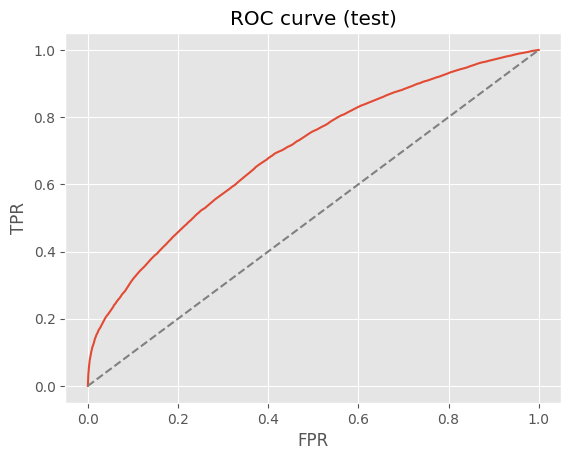

In [ ]:
lanzar_modelo(df_dev,df_val,"HasDetections",0.2, decision_tree)

In [ ]:
tree = export_graphviz(
                        decision_tree = decision_tree,
                        out_file=None,
                        max_depth=8,
                        feature_names=df_dev.drop("HasDetections", axis = 1).columns,
                        class_names=['No Malware', 'Malware'],
                        filled=True,
                        impurity=True,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        )

In [ ]:
graphviz.Source(tree)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
#top_features
top_features = pd.Series(decision_tree.feature_importances_, index=df_dev.drop("HasDetections", axis = 1).columns).sort_values(ascending=False).head(20)

In [ ]:
#tiene sentido que SmartScreen sea un predictor.
#SmartScreen es una tecnología de seguridad desarrollada por Microsoft que está diseñada para proteger a los usuarios de
#Windows contra descargas y aplicaciones maliciosas en línea. Está integrada en el sistema operativo Windows
#también tiene sentido AVProductStatesIdentifier (identificador de estado del antivirus) y  AvSigVersion (y versión del antivirus)

top_features

SmartScreen_ExistsNotSet                        0.39
AVProductStatesIdentifier_encoded               0.20
AvSigVersion                                    0.13
Census_TotalPhysicalRAM                         0.06
AppVersion                                      0.02
Wdft_IsGamer                                    0.02
CountryIdentifier_encoded                       0.01
Census_OSInstallTypeName_UUPUpgrade             0.01
Census_ProcessorModelIdentifier_encoded         0.01
Census_IsTouchEnabled                           0.01
Census_PrimaryDiskTotalCapacity                 0.01
OsBuildLab_encoded                              0.01
IsProtected                                     0.01
Census_FirmwareManufacturerIdentifier_encoded   0.01
Census_OSBuildRevision                          0.01
Census_OSEdition_CoreSingleLanguage             0.01
Census_OEMModelIdentifier_encoded               0.00
Census_PowerPlatformRoleName_Slate              0.00
SmartScreen_unknown                           

<Axes: >

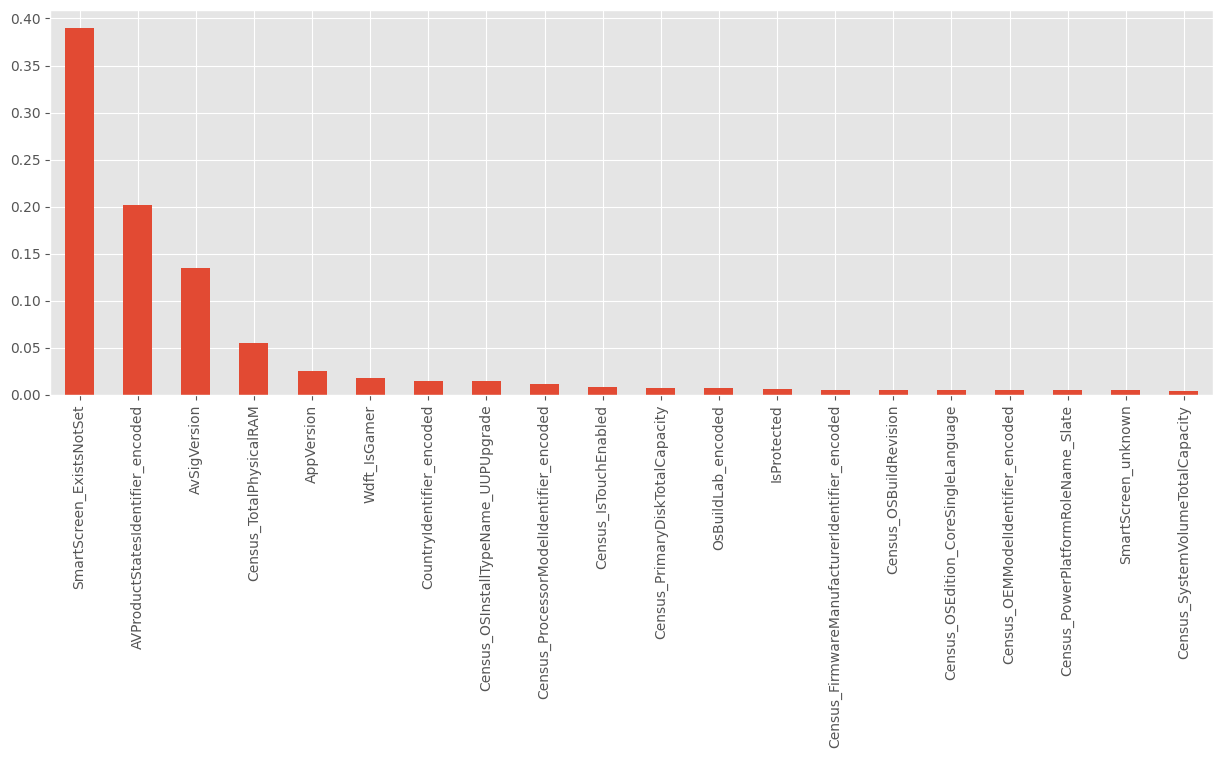

In [ ]:
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

### Definition and Evaluation of the Model: Random Forest Classifier

This model also performs slightly better than a model that would always predict ones or zeros. The results are practically the same as those obtained with the Decision Tree.

**Overfitting**: The difference between training and test accuracy is less than 1%, indicating no overfitting. The model performs slightly worse on the validation partition. The difference in ROC AUC scores between training and test sets is also less than 1%, which further confirms that there is no overfitting between the training and test datasets.

Increasing `n_estimators` beyond 100 does not significantly improve the model's performance, but it does increase the computation time.

Regarding `min_samples_split` and `max_depth`, the behavior is very similar to the Decision Tree model.



In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_split=1000, random_state=42)

c:\Users\mirei\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


modelo = RandomForestClassifier(max_depth=12, min_samples_split=1000, random_state=42)
accuracy train = 0.6427795912827948
accuracy test = 0.6388714285714285
accuracy validation = 0.5988946519286924


confusion_matrix_train =
 [[83649 53665]
 [46356 96328]]


precision train = 0.6422166367763829
precision test = 0.6399744606134773
precision validation = 0.5611460970806553


recall train = 0.6751142384570099
recall test = 0.6719177699569856
recall validation = 0.725649600514923


F1-score train = 0.6582546629902589
F1-score test = 0.655557220912646
F1-score validation = 0.6328828141684718


ROC AUC Score (train) for RandomForestClassifier(max_depth=12, min_samples_split=1000, random_state=42): 0.7024580520001037
ROC AUC Score (test) for RandomForestClassifier(max_depth=12, min_samples_split=1000, random_state=42): 0.697390835571431


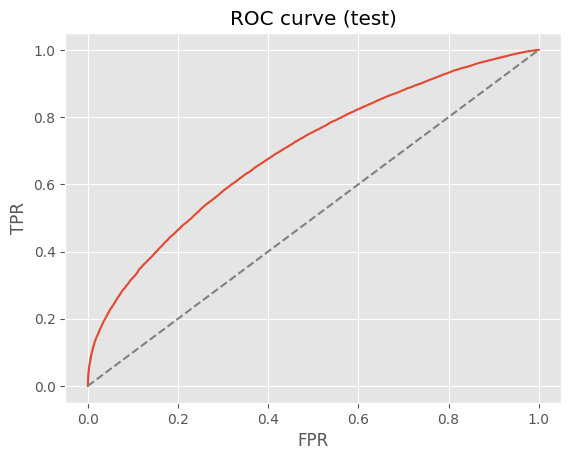

In [ ]:
lanzar_modelo(df_dev,df_val,"HasDetections",0.2, random_forest)

In [ ]:
#rf_1.fit(
   # X=X_train,
    ##y=np.ravel(y_train)
#)

### Definition and Evaluation of the model: XGBoost Classifier

This is the model that predicts the best of the three, with an accuracy of approximately 0.66.

**Overfitting**: The difference between training and test accuracy is less than 1%, which suggests no overfitting. However, the model performs worse on the validation partition.

The difference between the ROC AUC Score for training and testing is slightly higher in this case, but still less than 2%, so initially, there seems to be no significant overfitting between the training and test datasets.

This model is very sensitive to the degree of depth, given the same value of gamma. Beyond 6 levels of depth, overfitting increases significantly.


In [ ]:
#probamos un XGB
xg_boost = xgb.XGBClassifier(
    n_estimators=100,       # Número de árboles de decisión
    learning_rate=0.1,      # Tasa de aprendizaje
    max_depth=6,            # Profundidad máxima de cada árbol
    subsample=0.8,          # Subconjunto de muestras utilizadas para entrenar cada árbol
    colsample_bytree=0.8,   # Subconjunto de características utilizadas para entrenar cada árbol
    objective='binary:logistic',      # Función de pérdida para clasificación binaria
    gamma = 0.1,
    random_state=42         # Semilla para reproducibilidad
)


modelo = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
accuracy train = 0.6662726162329731
accuracy test = 0.6557285714285714
accuracy validation = 0.6270083601114681


confusion_matrix_train =
 [[90486 46828]
 [46615 96069]]


precision train = 0.6722954295751485
precision test = 0.6631534922626

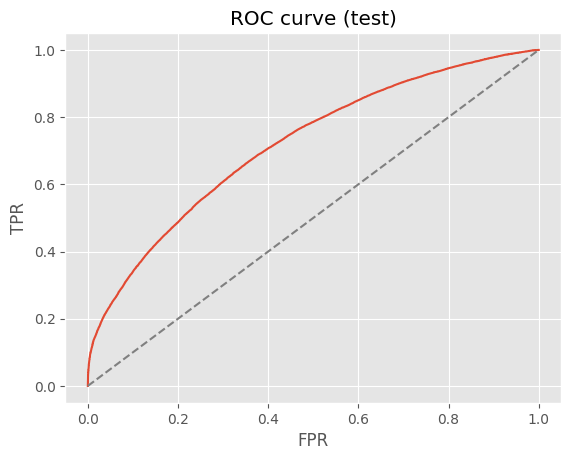

In [ ]:

lanzar_modelo(df_dev,df_val,"HasDetections",0.2, xg_boost)